In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset.csv") #reading the csv file into pandas data frame

In [3]:
df.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
#checking the shape of dataset
df.shape

(9551, 21)

In [5]:
df.info() #getting the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
#checking the columns of the dataset
print("\033[1mColumns of dataset are : \033[0m")
for i,n in enumerate(df.columns):
    print(i+1,n,sep="-")

Columns of dataset are : 
1-Restaurant ID
2-Restaurant Name
3-Country Code
4-City
5-Address
6-Locality
7-Locality Verbose
8-Longitude
9-Latitude
10-Cuisines
11-Average Cost for two
12-Currency
13-Has Table booking
14-Has Online delivery
15-Is delivering now
16-Switch to order menu
17-Price range
18-Aggregate rating
19-Rating color
20-Rating text
21-Votes


In [7]:
# Separate categorical and numerical columns
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print("\033[1mCategorical Columns:\033[0m", categorical_columns,sep="\n")
print()
print()

print("\033[1mNumerical Columns:\033[0m", numerical_columns)

Categorical Columns:
['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


Numerical Columns: ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [8]:
#checking for middle columns, if they are usable we will keep it ,otherwise we will remove them from the dataset
middle = ['Longitude','Latitude']
df[middle]

Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]

In [9]:
#remove unnecessary columns from the dataset
removed_columns = ['Longitude','Latitude',"Country Code",'Locality Verbose']
df.drop(removed_columns, axis = 1, inplace=True)

In [10]:
#checking the columns of the dataset
print("\033[1mColumns of dataset are : \033[0m")
for i,n in enumerate(df.columns):
    print(i+1,n,sep="-")

Columns of dataset are : 
1-Restaurant ID
2-Restaurant Name
3-City
4-Address
5-Locality
6-Cuisines
7-Average Cost for two
8-Currency
9-Has Table booking
10-Has Online delivery
11-Is delivering now
12-Switch to order menu
13-Price range
14-Aggregate rating
15-Rating color
16-Rating text
17-Votes


In [11]:
df.head(5)

Restaurant ID         Restaurant Name              City  \
0        6317637        Le Petit Souffle       Makati City   
1        6304287        Izakaya Kikufuji       Makati City   
2        6300002  Heat - Edsa Shangri-La  Mandaluyong City   
3        6318506                    Ooma  Mandaluyong City   
4        6314302             Sambo Kojin  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

# Cheking for Missing values

In [12]:
if df.isnull().sum().any():
    print("Missing Values Are present in the data set And The Missing Values Are In Column(s):")
    for col in df.columns[df.isnull().sum() > 0]:
        print("\033[1m" + col + "\033[0m")
else:
    print('No Missing Values Are In the dataset')


Missing Values Are present in the data set And The Missing Values Are In Column(s):
Cuisines


# Cheking for Duplicated values

In [13]:
if df.duplicated().sum().any():
    print("Missing Values Are present in the data set And The Missing Values Are In Column(s):")
    for col in df.columns[df.duplicated().sum() > 0]:
        print("\033[1m" + col + "\033[0m")
else:
    print('\033[1mNo Missing Values Are In the dataset\033[0m')


No Missing Values Are In the dataset


## Handling the Missing Values 

In [14]:
cuisines_mode = df['Cuisines'].mode()[0]

In [15]:
#since Cuisines is a categorical column we will replace the missing values with mode of the cuisines column
df['Cuisines'].fillna(cuisines_mode, inplace=True)

In [16]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [17]:
#checking the unique values in column
print("No Of unique values in column \033[1mRestaurant Name   : \033[0m",df['Restaurant Name'].nunique())


No Of unique values in column Restaurant Name   :  7446


In [18]:
#checking the unique values in column
print("No Of unique values in column \033[1mCity   : \033[0m",df['City'].nunique())


No Of unique values in column City   :  141


In [19]:
#checking the unique values in column
print("No Of unique values in column \033[1mCurrency  : \033[0m",df['Currency'].nunique(),'\n','The unique values are  : ','\n',df['Currency'].unique())


No Of unique values in column Currency  :  12 
 The unique values are  :  
 ['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)'
 'Pounds(��)' 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)'
 'Turkish Lira(TL)']


In [20]:
#checking the unique values in column
print("No Of unique values in column \033[1mHas Table booking  : \033[0m",df['Has Table booking'].nunique(),'\n','The unique values are  : ','\n',df['Has Table booking'].unique())


No Of unique values in column Has Table booking  :  2 
 The unique values are  :  
 ['Yes' 'No']


In [21]:
#checking the unique values in column
print("No Of unique values in column \033[1mPrice range  : \033[0m",df['Price range'].nunique(),'\n','The unique values are  : ','\n',df['Price range'].unique())


No Of unique values in column Price range  :  4 
 The unique values are  :  
 [3 4 2 1]


In [22]:
#checking the unique values in column
print("No Of unique values in column \033[1mRating Color  : \033[0m",df['Rating color'].nunique(),'\n','The unique values are  : ','\n',df['Rating color'].unique())


No Of unique values in column Rating Color  :  6 
 The unique values are  :  
 ['Dark Green' 'Green' 'Yellow' 'Orange' 'White' 'Red']


In [23]:
#checking the unique values in column
print("No Of unique values in column \033[1mRating text : \033[0m",df['Rating text'].nunique(),'\n','The unique values are  : ','\n',df['Rating text'].unique())


No Of unique values in column Rating text :  6 
 The unique values are  :  
 ['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']


In [24]:
df.head(10)

Restaurant ID                           Restaurant Name              City  \
0        6317637                          Le Petit Souffle       Makati City   
1        6304287                          Izakaya Kikufuji       Makati City   
2        6300002                    Heat - Edsa Shangri-La  Mandaluyong City   
3        6318506                                      Ooma  Mandaluyong City   
4        6314302                               Sambo Kojin  Mandaluyong City   
5       18189371                              Din Tai Fung  Mandaluyong City   
6        6300781                                Buffet 101        Pasay City   
7        6301290                                   Vikings        Pasay City   
8        6300010  Spiral - Sofitel Philippine Plaza Manila        Pasay City   
9        6314987                                  Locavore        Pasig City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
5  Ground Floor, Mega Fashion Hall, SM Megamall, ...   
6  Building K, SM By The Bay, Sunset Boulevard, M...   
7  Building B, By The Bay, Seaside Boulevard, Mal...   
8  Plaza Level, Sofitel Philippine Plaza Manila, ...   
9  Brixton Technology Center, 10 Brixton Street, ...   

                                          Locality  \
0        Century City Mall, Poblacion, Makati City   
1       Little Tokyo, Legaspi Village, Makati City   
2       Edsa Shangri-La, Ortigas, Mandaluyong City   
3           SM Megamall, Ortigas, Mandaluyong City   
4           SM Megamall, Ortigas, Mandaluyong City   
5           SM Megamall, Ortigas, Mandaluyong City   
6  SM by the Bay, Mall of Asia Complex, Pasay City   
7  SM by the Bay, Mall of Asia Complex, Pasay City   
8      Sofitel Philippine Plaza Manila, Pasay City   
9                                        Kapitolyo   

                             Cuisines  Average Cost for two          Currency  \
0          French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                            Japanese                  1200  Botswana Pula(P)   
2    Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                     Japanese, Sushi                  1500  Botswana Pula(P)   
4                    Japanese, Korean                  1500  Botswana Pula(P)   
5                             Chinese                  1000  Botswana Pula(P)   
6                     Asian, European                  2000  Botswana Pula(P)   
7  Seafood, Filipino, Asian, European                  2000  Botswana Pula(P)   
8             European, Asian, Indian                  6000  Botswana Pula(P)   
9                            Filipino                  1100  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   
5                No                  No                No   
6               Yes                  No                No   
7               Yes                  No                No   
8               Yes                  No                No   
9               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green

In [25]:
df['Aggregate rating'].nunique

<bound method IndexOpsMixin.nunique of 0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64>

In [26]:
df.groupby(['Aggregate rating'])['Rating text'].value_counts().sort_values(ascending=False)

Aggregate rating  Rating text
0.0               Not rated      2148
3.2               Average         522
3.1               Average         519
3.4               Average         498
3.3               Average         483
3.5               Good            480
3.0               Average         468
3.6               Good            458
3.7               Good            427
3.8               Good            400
2.9               Average         381
3.9               Good            335
2.8               Average         315
4.1               Very Good       274
4.0               Very Good       266
2.7               Average         250
4.2               Very Good       221
2.6               Average         191
4.3               Very Good       174
4.4               Very Good       144
2.5               Average         110
4.5               Excellent        95
2.4               Poor             87
4.6               Excellent        78
4.9               Excellent        61
2.3               Po

In [27]:
df['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

In [28]:
df.groupby('Rating text')['Price range'].value_counts().sort_values(ascending=False)

Rating text  Price range
Average      1              1898
Not rated    1              1700
Average      2              1425
Good         2               794
             1               608
             3               498
Very Good    3               416
Not rated    2               402
Very Good    2               325
Average      3               313
Good         4               200
Very Good    4               194
             1               144
Excellent    3               126
Average      4               101
Poor         2                98
Excellent    4                74
             2                69
Poor         1                62
Not rated    3                35
Excellent    1                32
Poor         3                20
Not rated    4                11
Poor         4                 6
Name: Price range, dtype: int64

In [29]:
df['Currency'].value_counts().sort_values(ascending=False)

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

### VISUALIZATION


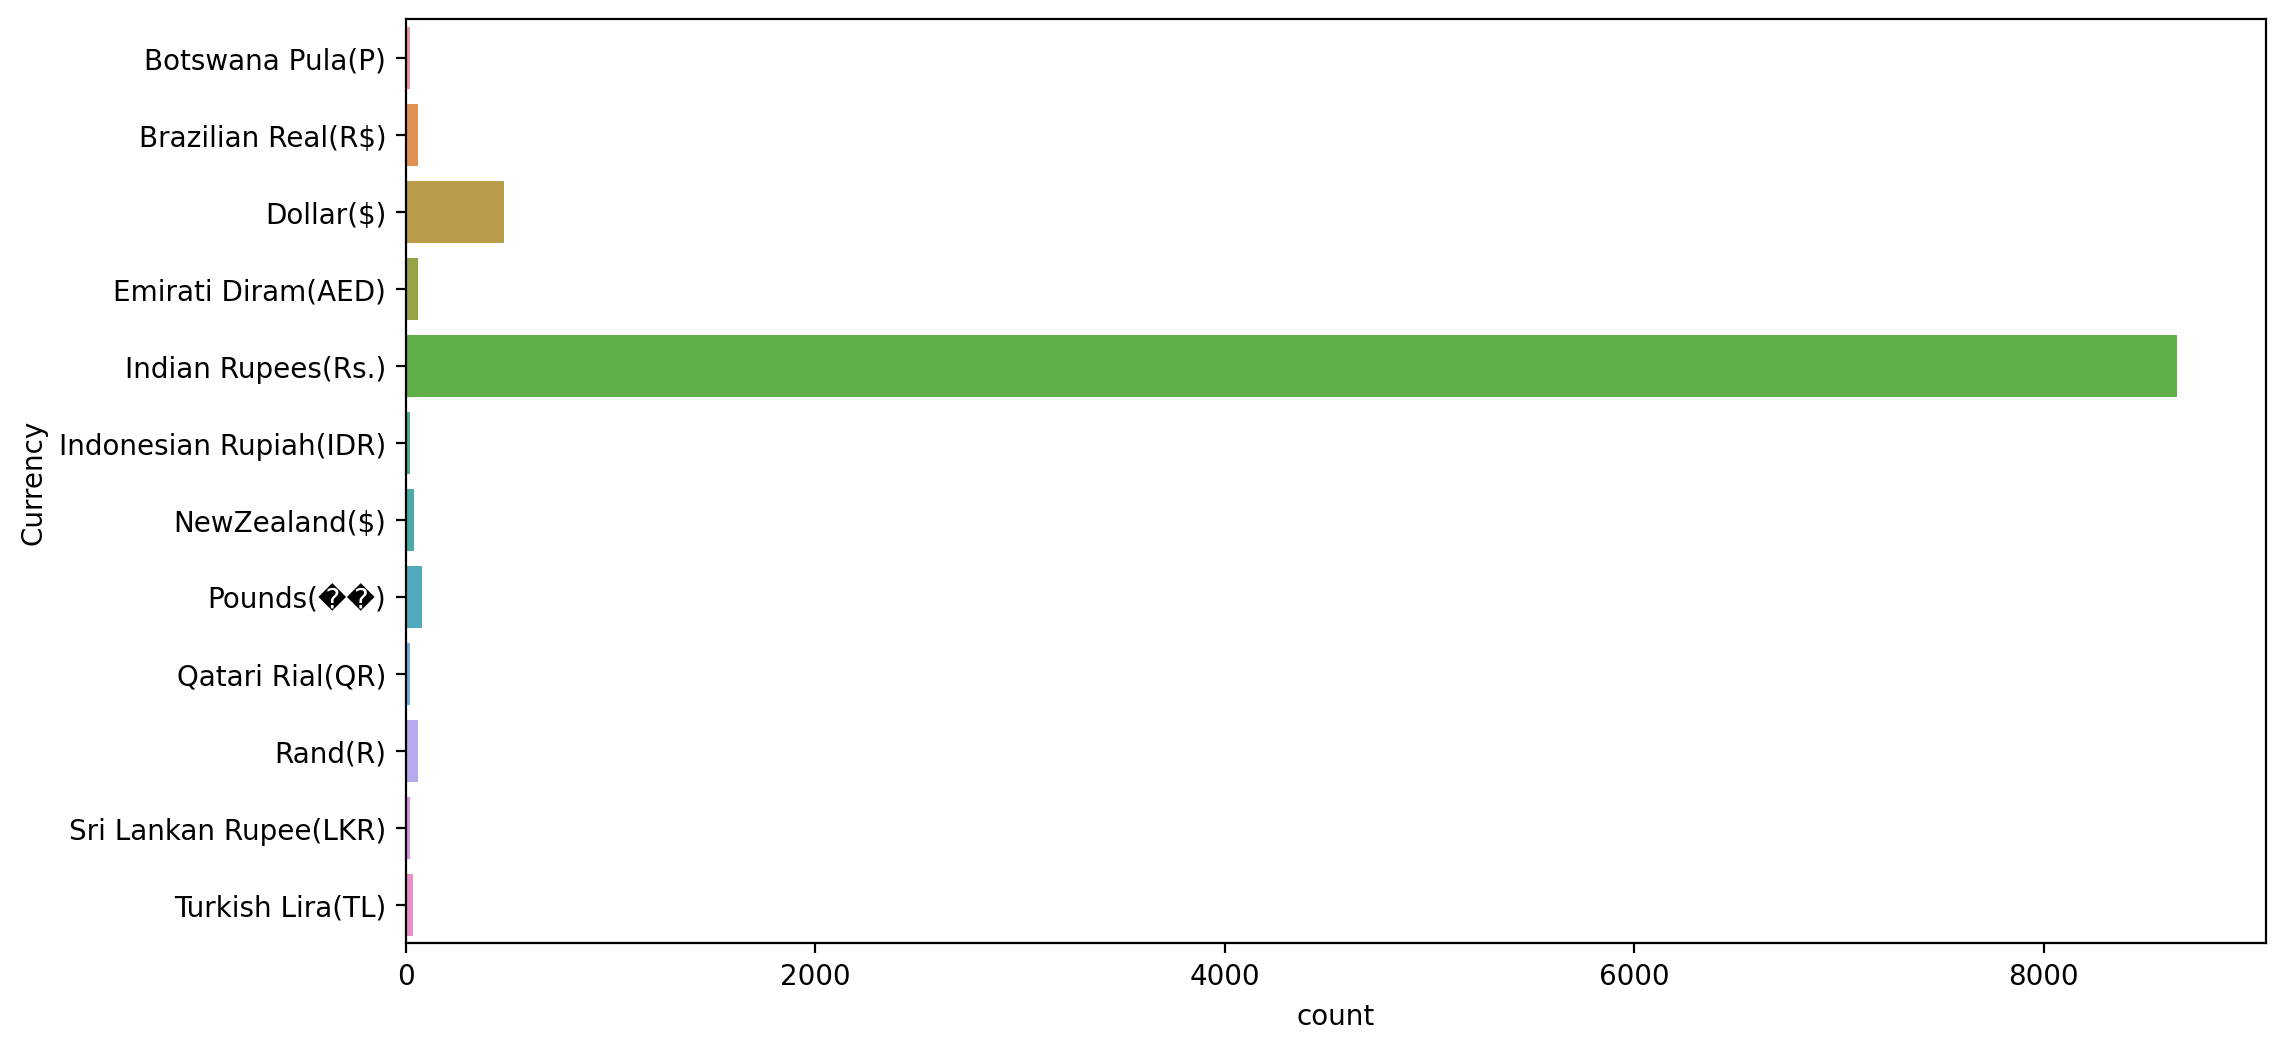

In [30]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(y = 'Currency',data=df)
plt.show()

This plot defines that Indian Rupees is used in most of the cases

In [31]:
df.groupby('Currency')['City'].value_counts().sort_values(ascending=False)

Currency            City          
Indian Rupees(Rs.)  New Delhi         5473
                    Gurgaon           1118
                    Noida             1080
                    Faridabad          251
                    Ghaziabad           25
                                      ... 
Dollar($)           Lincoln              1
                    Lakeview             1
                    Lakes Entrance       1
                    Inverloch            1
                    Victor Harbor        1
Name: City, Length: 141, dtype: int64

This proves that indian rupees is used in most cases in New Delhi

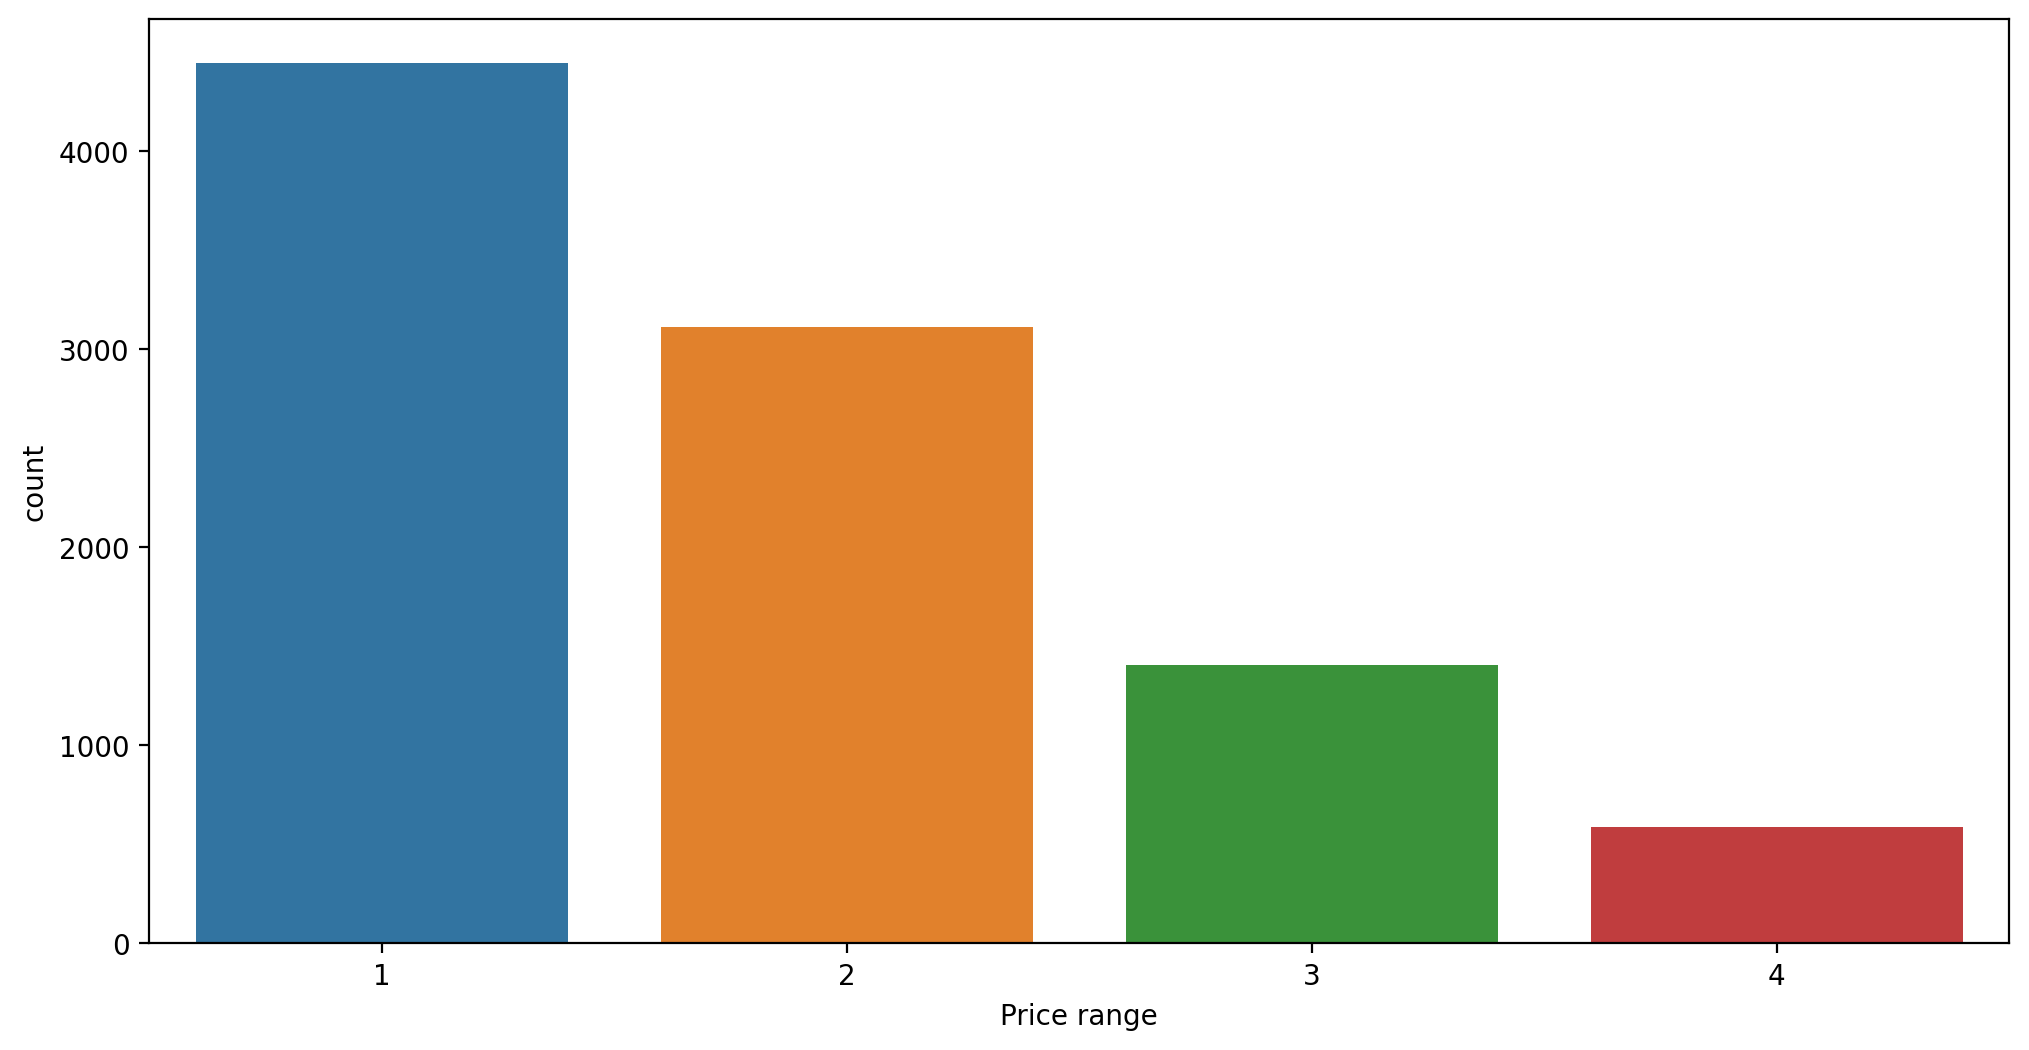

In [32]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(df['Price range'])
plt.show()

The Restraunts with average price of 1 occurs maximum times in our data set

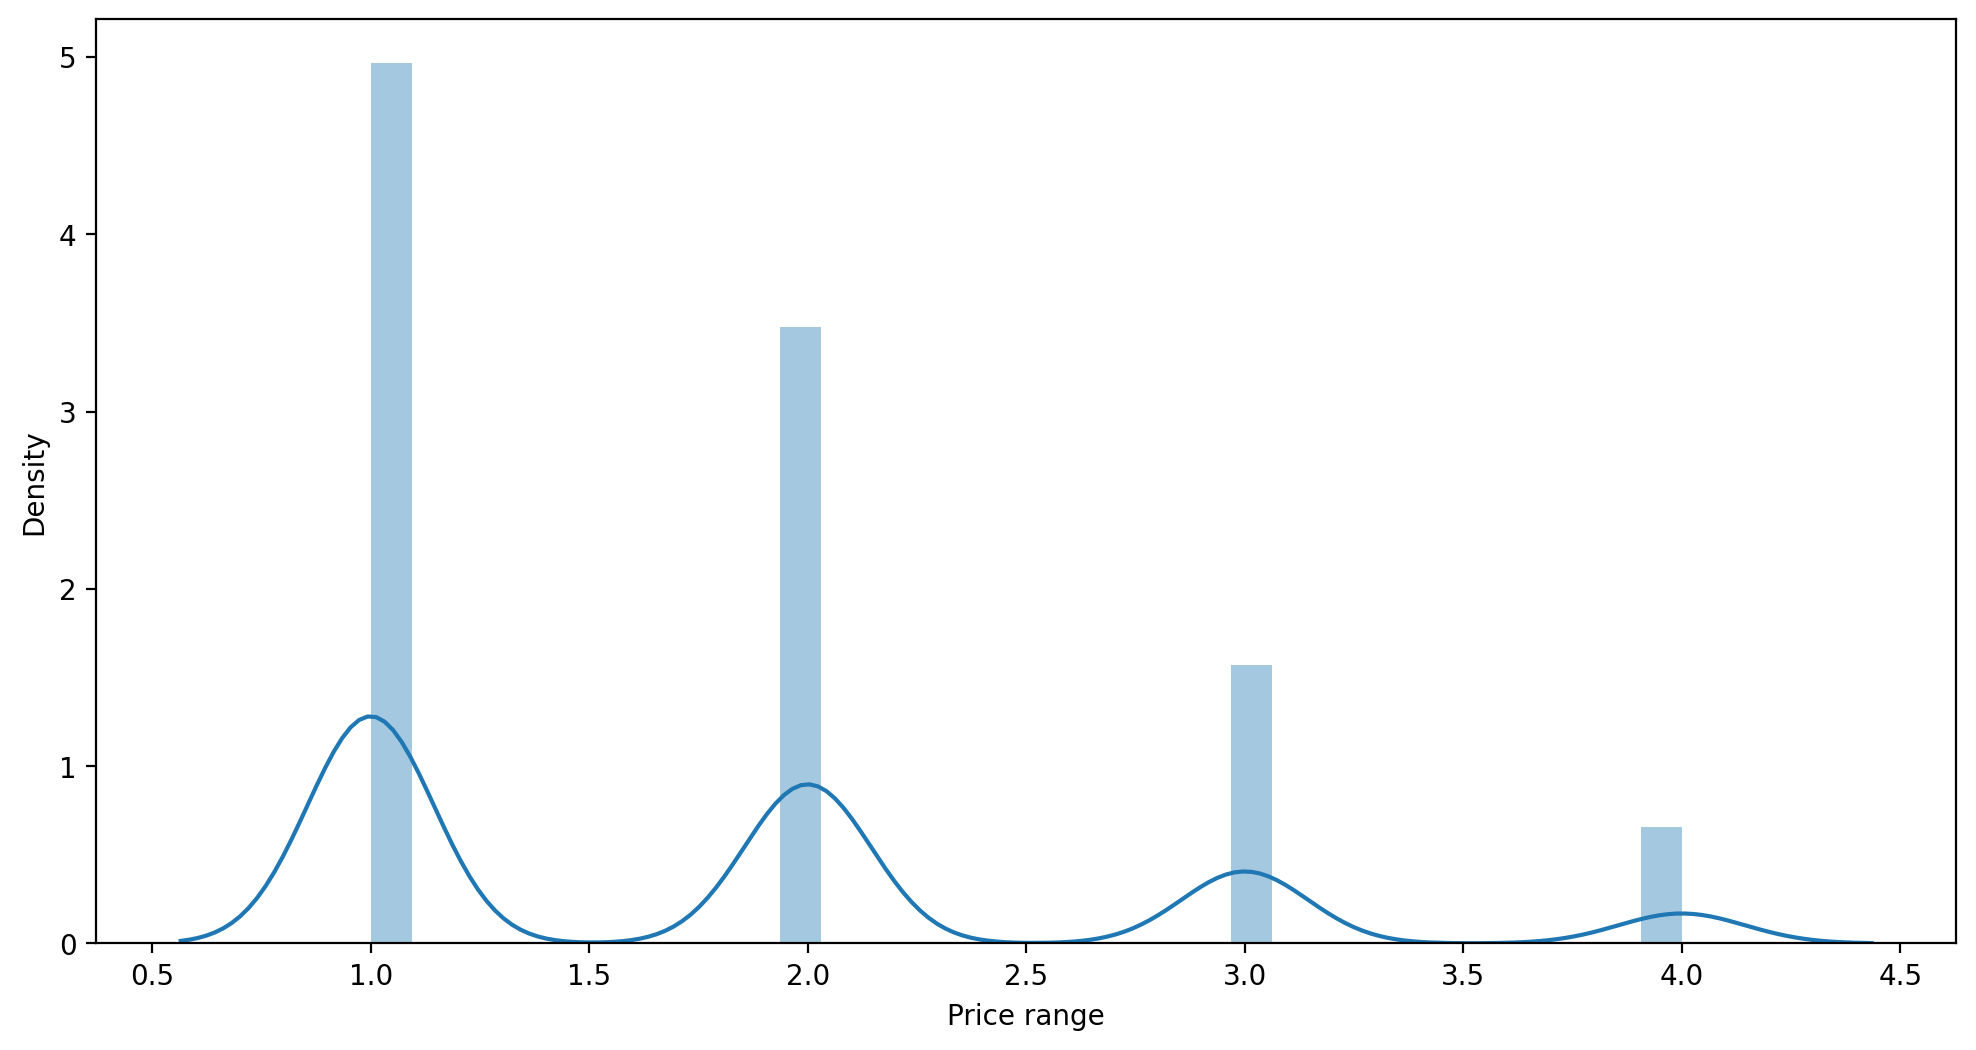

In [33]:
plt.figure(figsize=(12,6),dpi=200)
sns.distplot(df['Price range'])
plt.show()

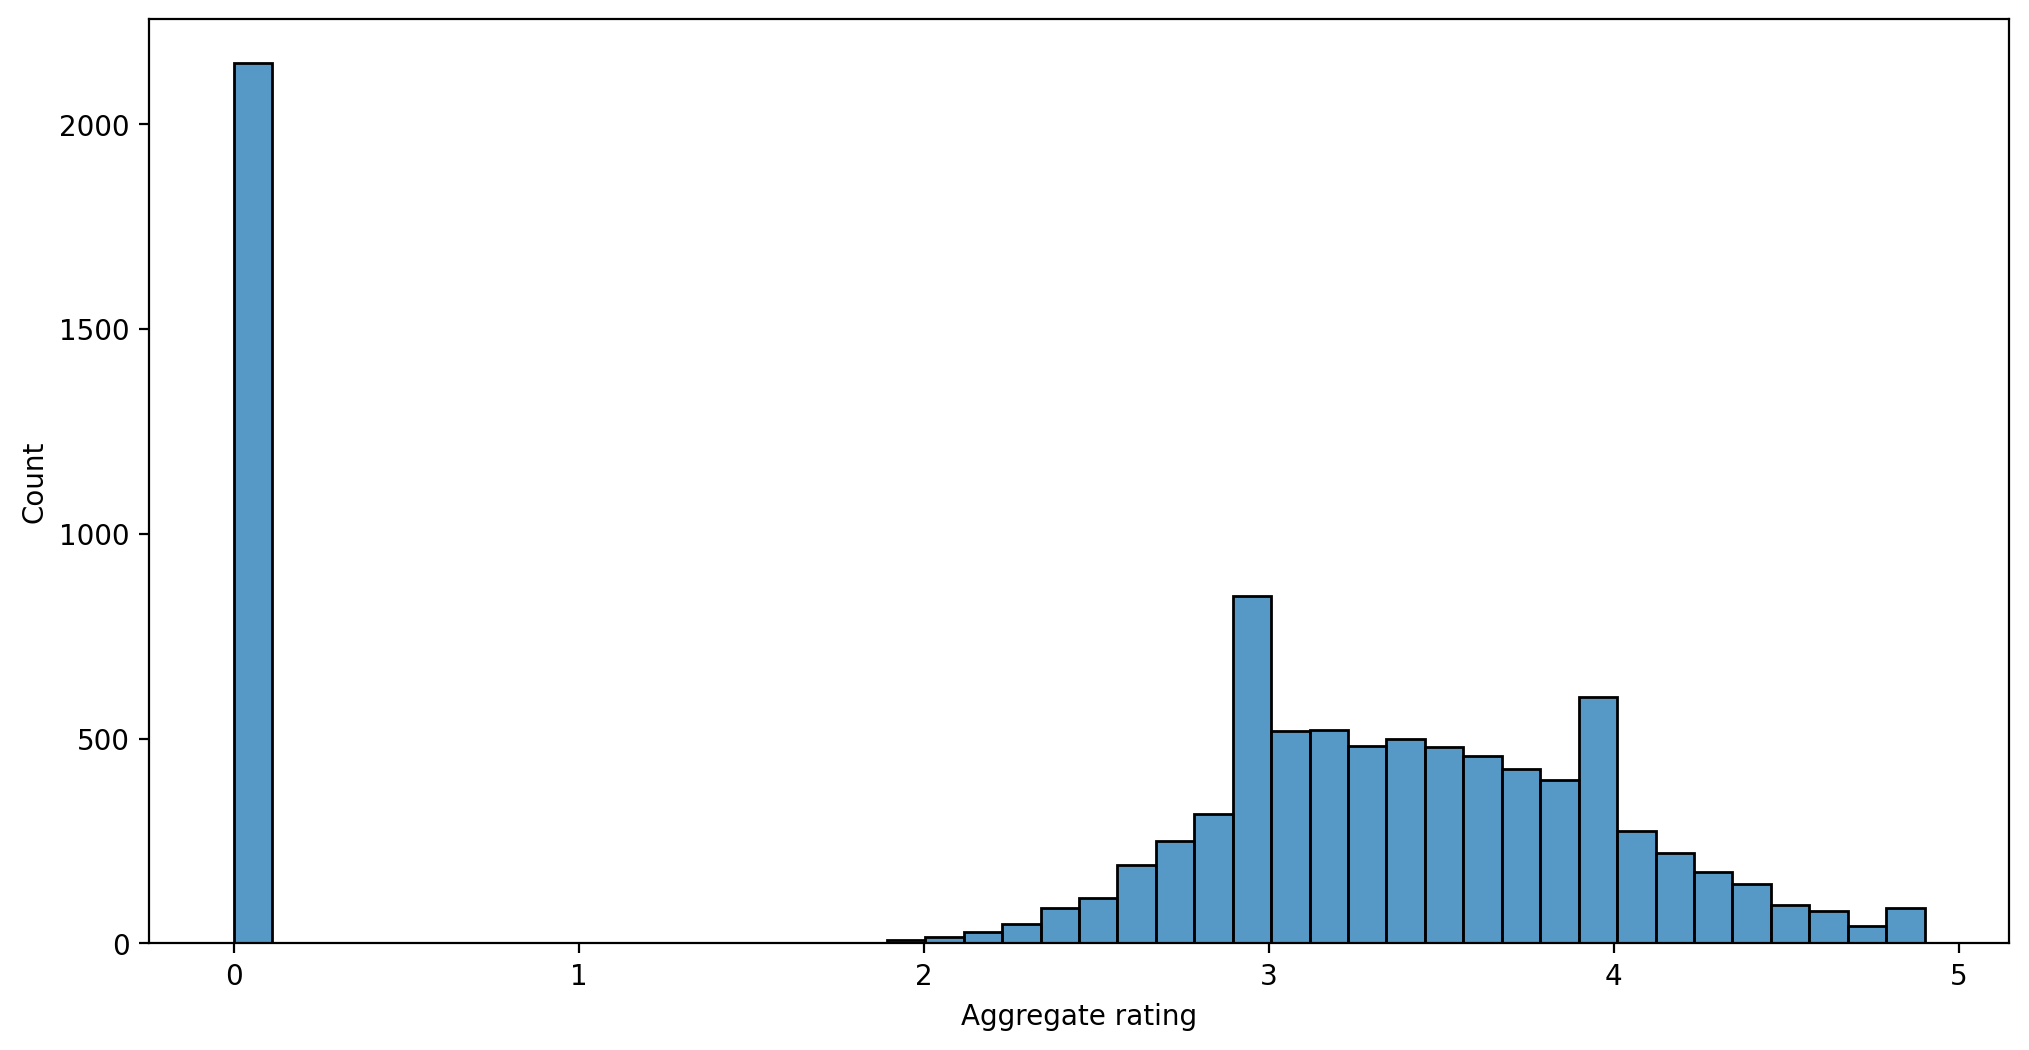

In [34]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(df['Aggregate rating'])
plt.show()

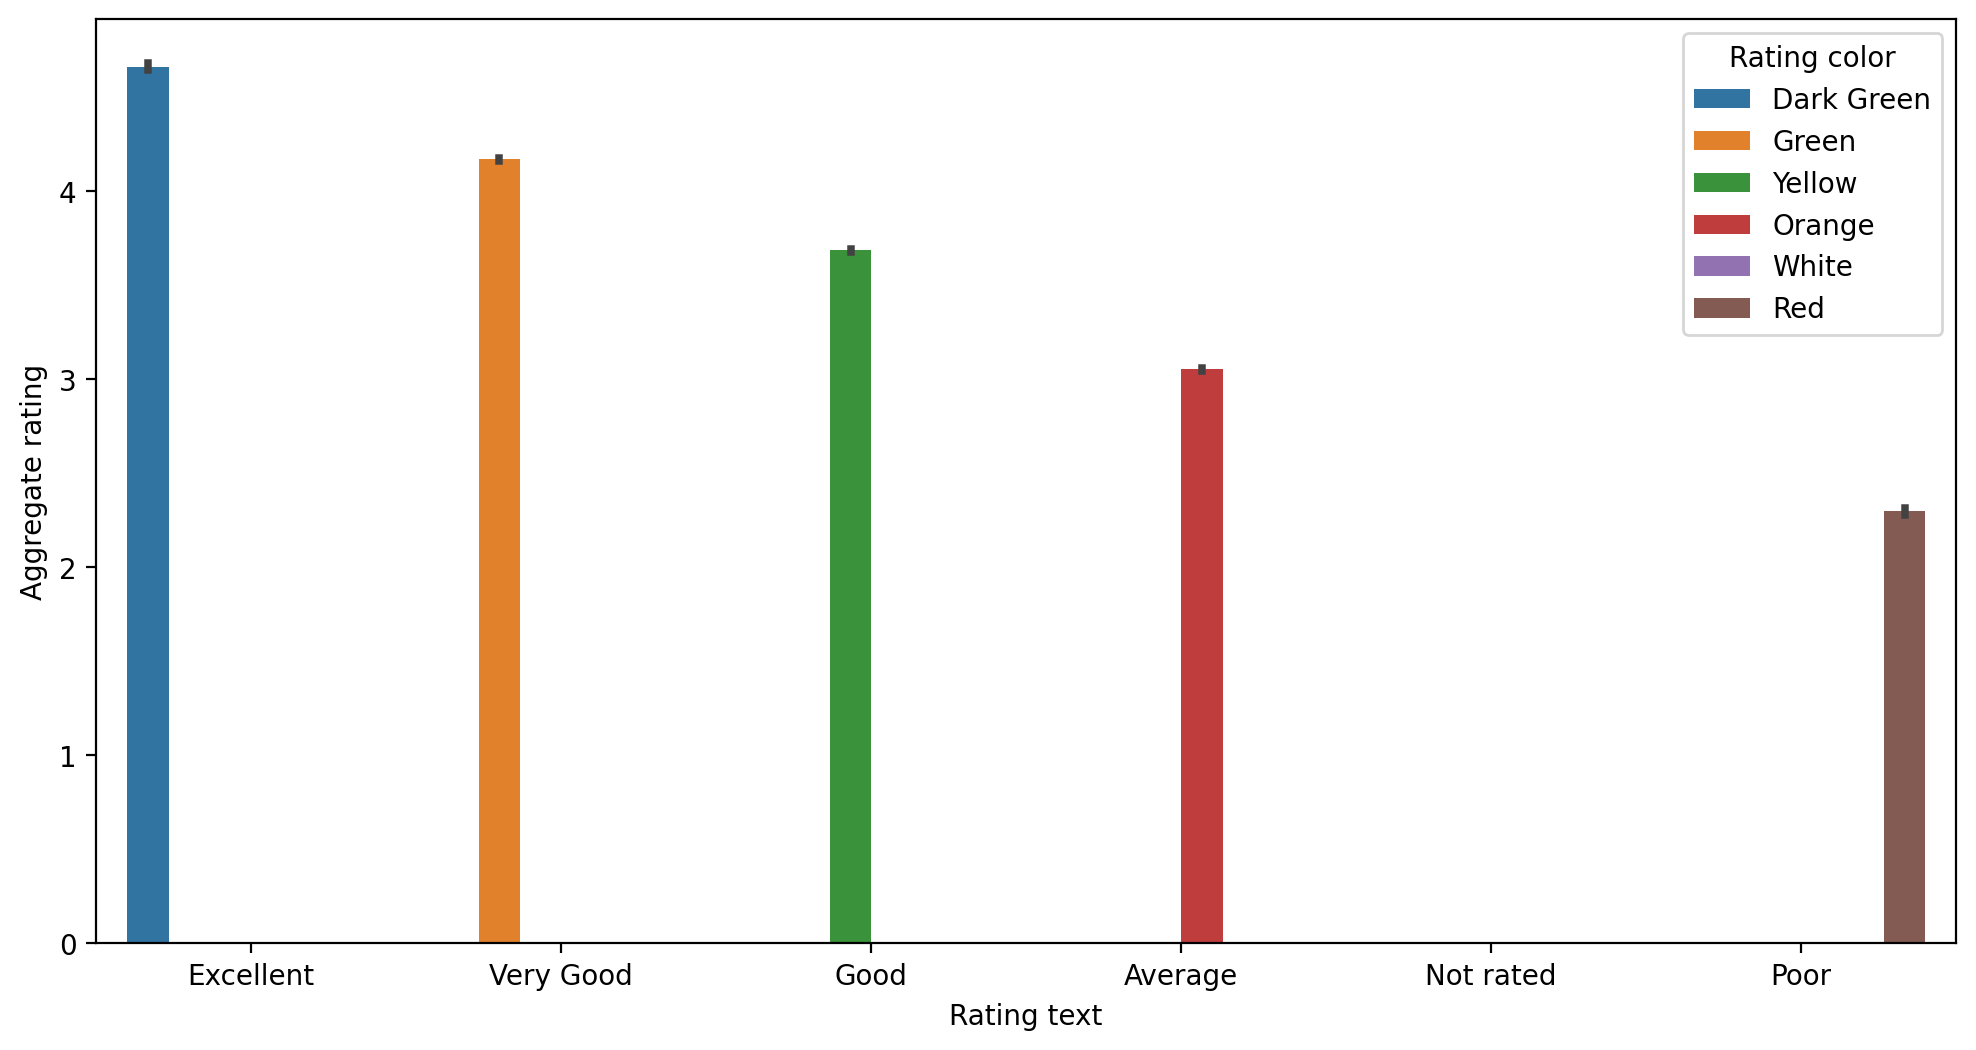

In [35]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(y='Aggregate rating',x='Rating text',hue = 'Rating color',data=df)
plt.show()

The Restraunts with more than 4 rating is have rating text as "Excellent" and is represented by DarkGreen

In [36]:
df.head(5)

Restaurant ID         Restaurant Name              City  \
0        6317637        Le Petit Souffle       Makati City   
1        6304287        Izakaya Kikufuji       Makati City   
2        6300002  Heat - Edsa Shangri-La  Mandaluyong City   
3        6318506                    Ooma  Mandaluyong City   
4        6314302             Sambo Kojin  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

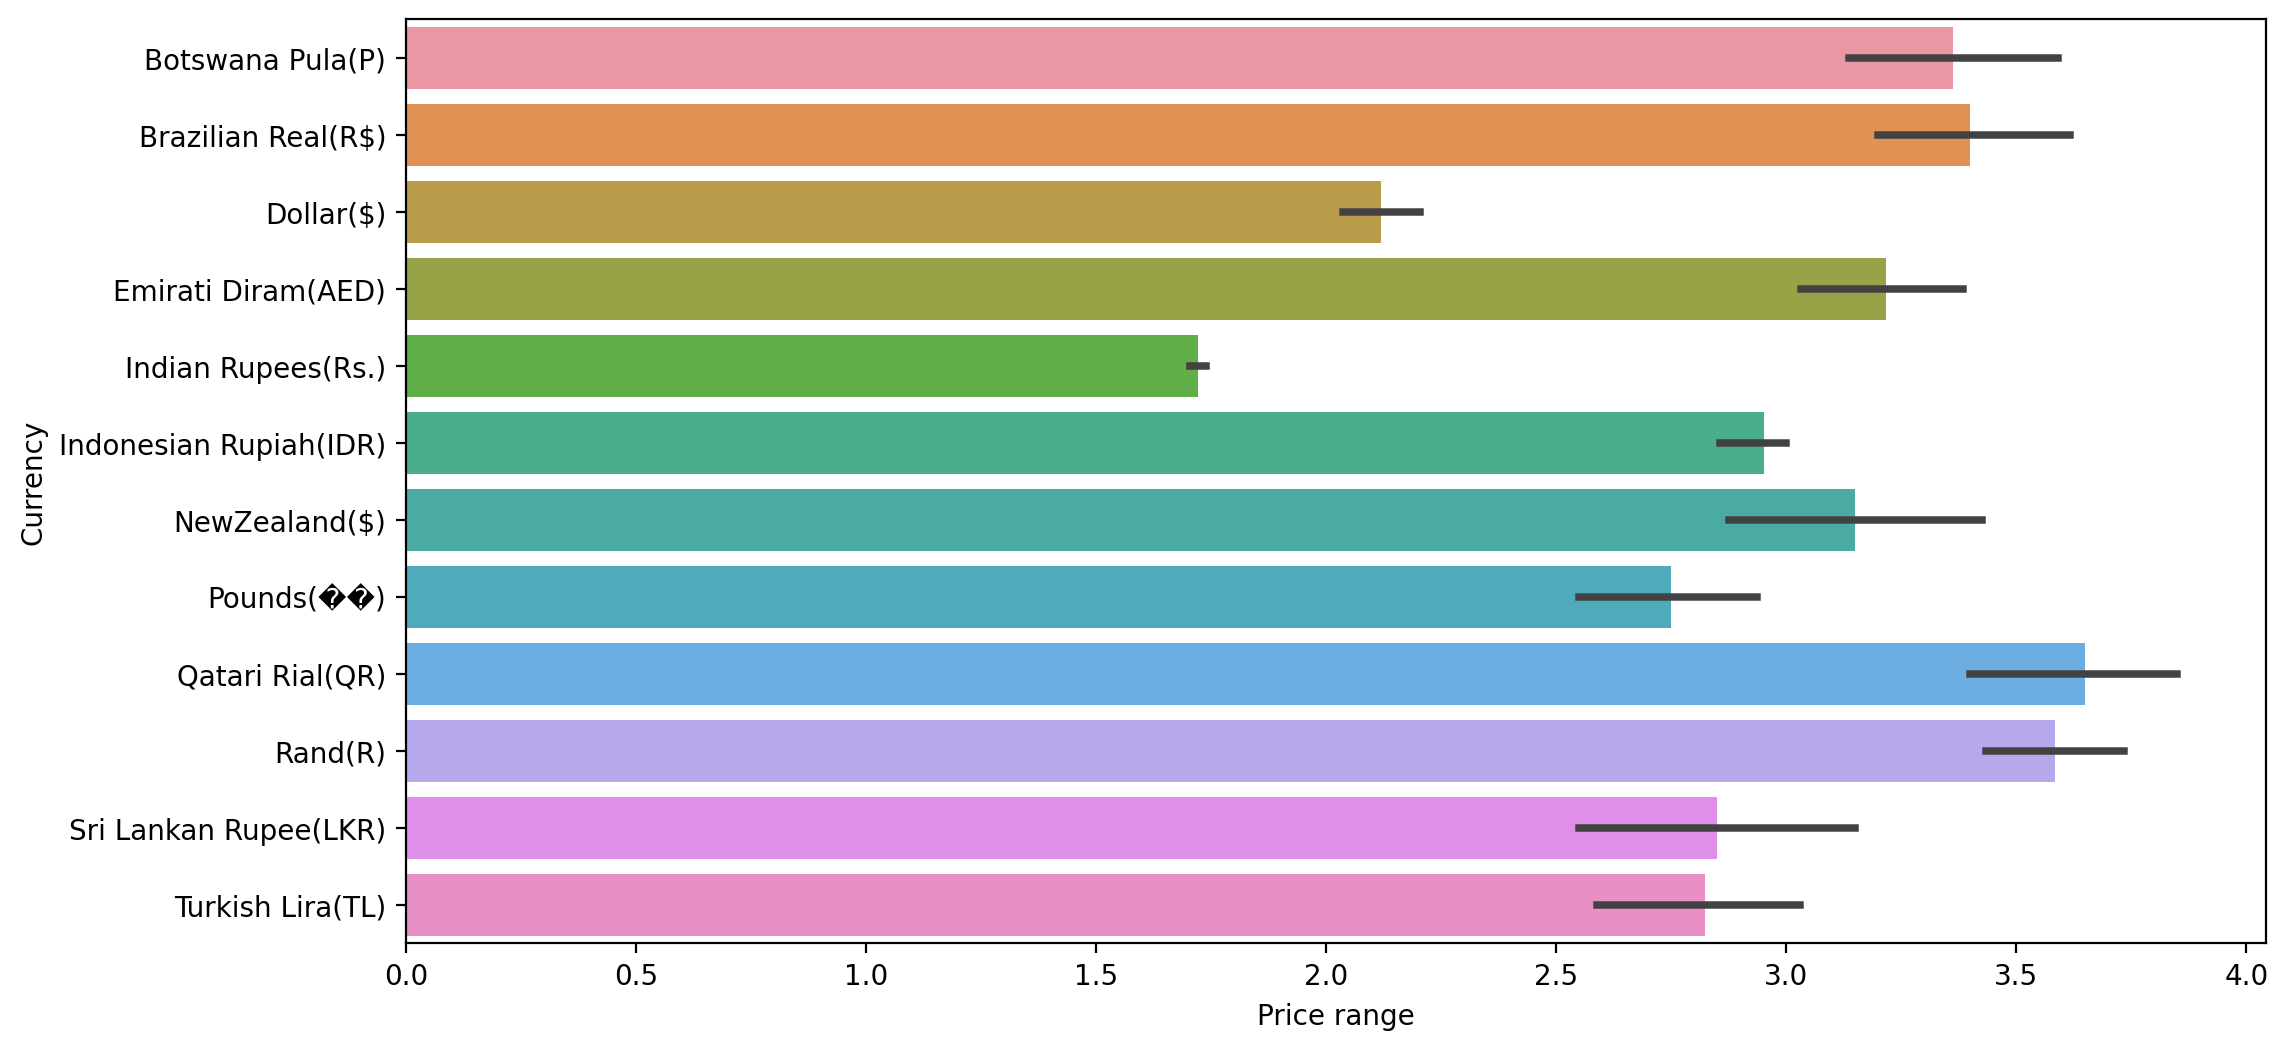

In [37]:
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(y='Currency',x='Price range',data=df)
plt.show()

In [38]:
df['Cuisines'].value_counts()

North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [39]:
top_three=df['Cuisines'].value_counts().head(3)
print("Top three Cuisines Are : \n",top_three)


Top three Cuisines Are : 
 North Indian             945
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64


In [40]:
Northindian_per = df['Cuisines'].value_counts()[0]/9551*100

In [41]:
Northindian_chinese_per =df['Cuisines'].value_counts()[1]/9551*100

In [42]:
chinese_per =df['Cuisines'].value_counts()[2]/9551*100

In [43]:
print("Top three Cuisines Are : \n")
top_three = df['Cuisines'].value_counts().head(3)
for cuisine, count in top_three.items():
    print(cuisine,':', count)
print()
print("Percentage of Restaurants That Serve Each Of The Top Cuisines:")
print("Percentage of 'North Indian' Restaurants That Serve Each Of The Top Cuisines          :","%.2f%%" %Northindian_per)
print("Percentage of 'North Indian, Chinese' Restaurants That Serve Each Of The Top Cuisines :","%.2f%%" %Northindian_chinese_per)
print("Percentage of 'Chinese' Restaurants That Serve Each Of The Top Cuisines               :","%.2f%%" %chinese_per)


Top three Cuisines Are : 

North Indian : 945
North Indian, Chinese : 511
Chinese : 354

Percentage of Restaurants That Serve Each Of The Top Cuisines:
Percentage of 'North Indian' Restaurants That Serve Each Of The Top Cuisines          : 9.89%
Percentage of 'North Indian, Chinese' Restaurants That Serve Each Of The Top Cuisines : 5.35%
Percentage of 'Chinese' Restaurants That Serve Each Of The Top Cuisines               : 3.71%


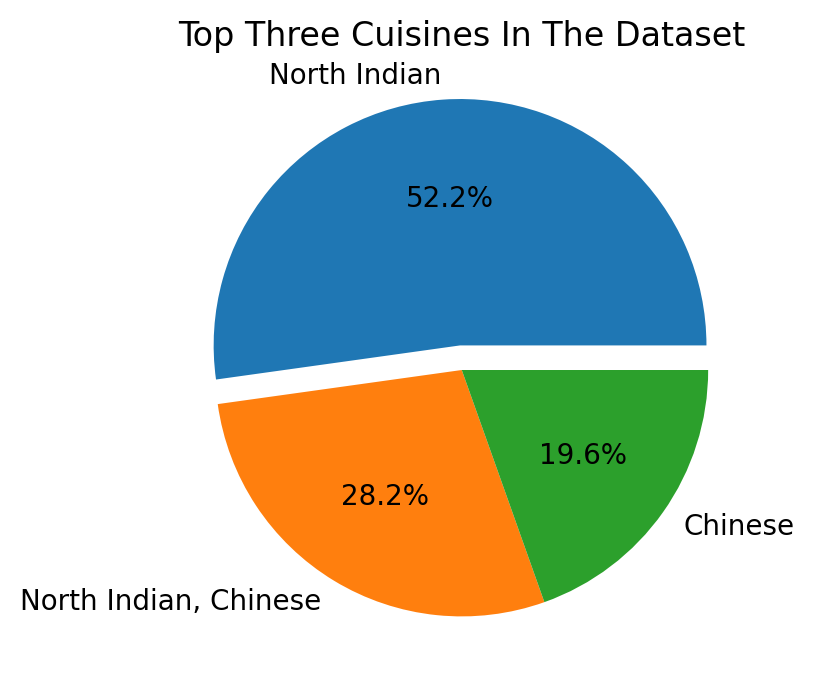

In [44]:
plt.figure(figsize=(4,4),dpi=200)
plt.pie(top_three,labels=top_three.index,autopct='%1.1f%%',explode = [0.1,0,0])
plt.title("Top Three Cuisines In The Dataset")
plt.show()

## Task2

In [45]:
city_with_max_restraunts = df.groupby('Restaurant Name')['City'].value_counts().sort_values(ascending=False)
max_res = city_with_max_restraunts.idxmax()
print("City With Maximum Number Of Restraunts : ")
print()
print(f"The city Name Is '{max_res[1]}'")



City With Maximum Number Of Restraunts : 

The city Name Is 'New Delhi'


In [46]:
print('Average Rating For Restaurants In Each City :-')
df.groupby('City')['Aggregate rating'].mean().sort_values(ascending= False)

Average Rating For Restaurants In Each City :-


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64

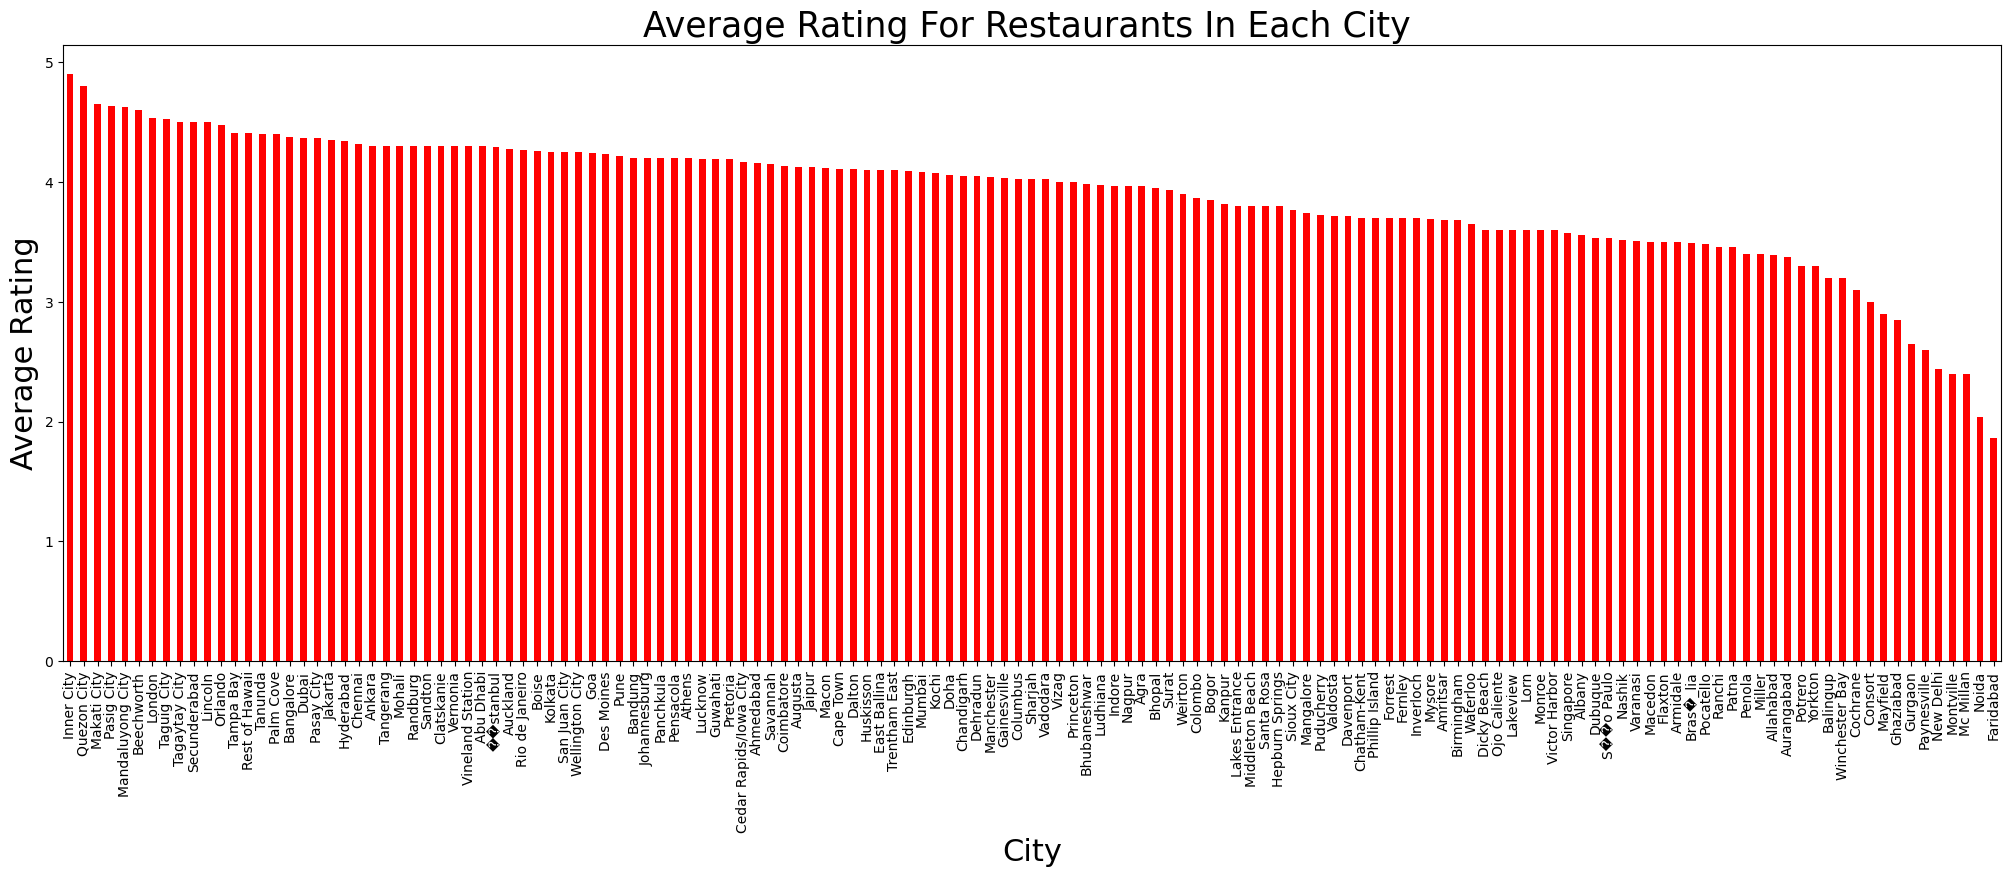

In [47]:
c=df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
c.plot(kind='bar',figsize=(25,8),color='red')
plt.xlabel('City',fontsize=22)
plt.ylabel('Average Rating',fontsize=22)
plt.title('Average Rating For Restaurants In Each City ',fontsize=25)
plt.show()

## LEVEL 1 TASK 3

In [48]:
df.head(5)

Restaurant ID         Restaurant Name              City  \
0        6317637        Le Petit Souffle       Makati City   
1        6304287        Izakaya Kikufuji       Makati City   
2        6300002  Heat - Edsa Shangri-La  Mandaluyong City   
3        6318506                    Ooma  Mandaluyong City   
4        6314302             Sambo Kojin  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

In [49]:
c=df['Price range'].value_counts().sort_values(ascending=False)
print(c)
print("Total Number Of Restraunts Is :",len(df))

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64
Total Number Of Restraunts Is : 9551


In [50]:
print("Percentage of Restaurants in each price range category is given Below :-")
print()
for i in c.iteritems(): 
    print(f"Percentage Of Restraunts Having Rating '{i[0]}',With a count Of '{i[1]}' :  ", "%.2f%%"%(i[1]/len(df) * 100)) 

Percentage of Restaurants in each price range category is given Below :-

Percentage Of Restraunts Having Rating '1',With a count Of '4444' :   46.53%
Percentage Of Restraunts Having Rating '2',With a count Of '3113' :   32.59%
Percentage Of Restraunts Having Rating '3',With a count Of '1408' :   14.74%
Percentage Of Restraunts Having Rating '4',With a count Of '586' :   6.14%


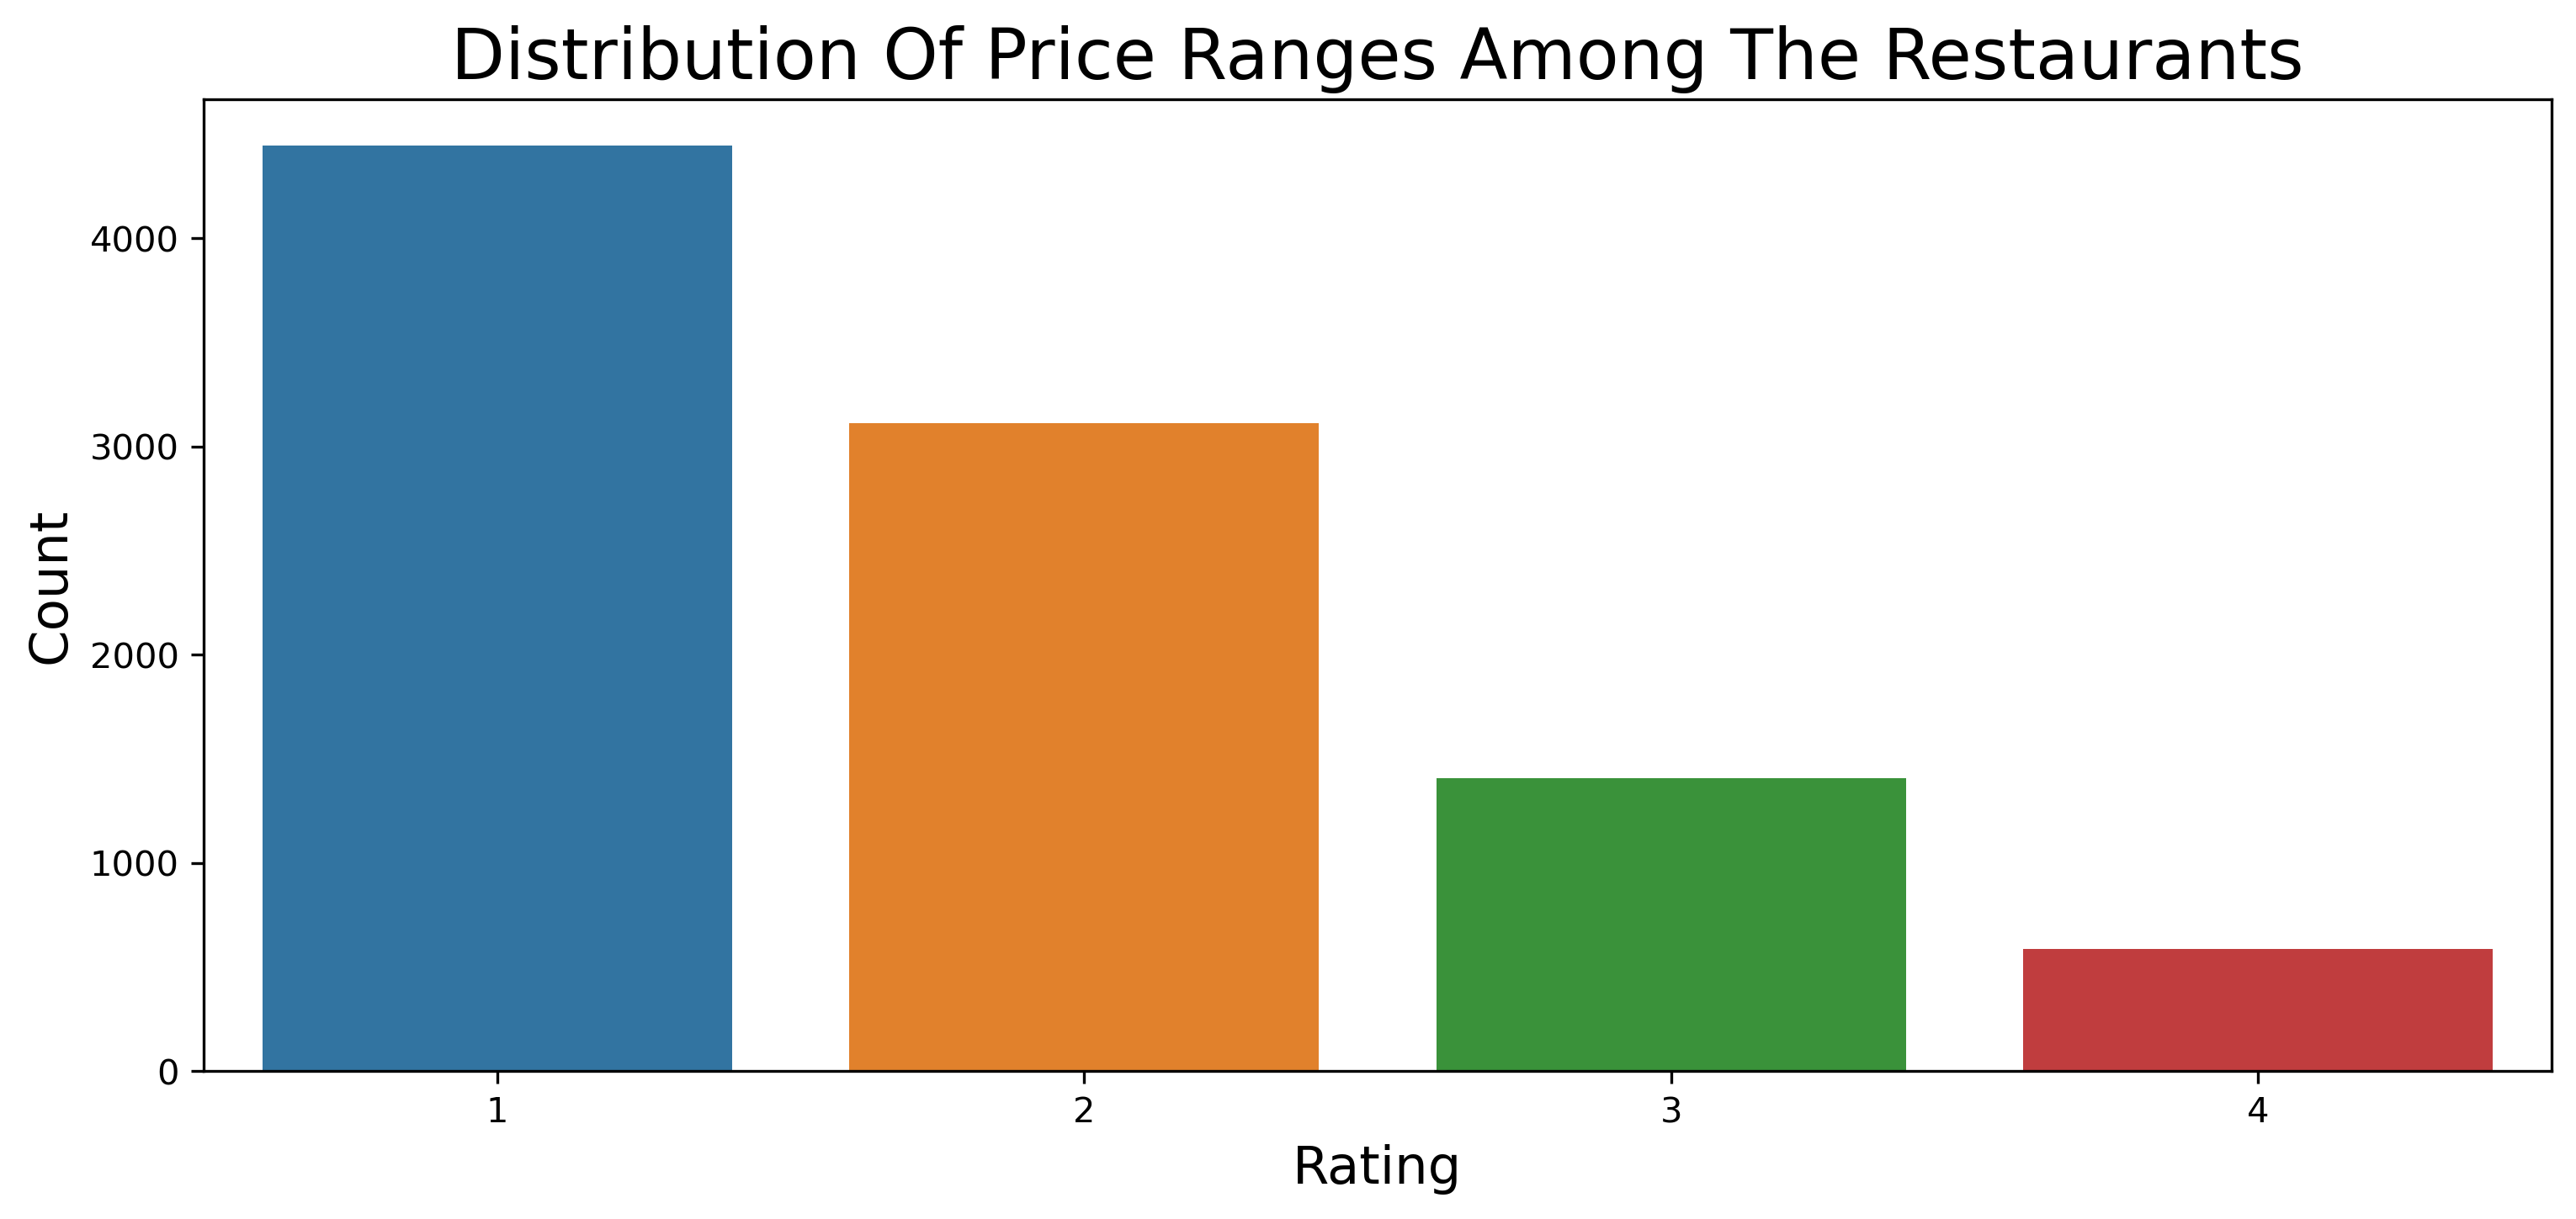

In [51]:
index = df['Price range'].value_counts().sort_values(ascending=False).index
index_values = df['Price range'].value_counts().sort_values(ascending=False).values
plt.figure(figsize=(12,5),dpi=300)
sns.barplot(y = index_values ,x = index)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Distribution Of Price Ranges Among The Restaurants",fontsize=20)
plt.show()

## LEVEL 1 TASK 4

### Determine the percentage of restaurants that offer online delivery

In [52]:
df.head(2)

Restaurant ID   Restaurant Name         City  \
0        6317637  Le Petit Souffle  Makati City   
1        6304287  Izakaya Kikufuji  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality                    Cuisines  \
0   Century City Mall, Poblacion, Makati City  French, Japanese, Desserts   
1  Little Tokyo, Legaspi Village, Makati City                    Japanese   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314  
1               4.5   Dark Green   Excellent    591

In [53]:
print(df['Has Online delivery'].value_counts())
print()
print("No. Of Restraunts Not Having Online Delivery : ",df['Has Online delivery'].value_counts().values[0])
print("No. Of Restraunts Having Online Delivery : ",df['Has Online delivery'].value_counts().values[1])
leng = len(df)
not_have = df['Has Online delivery'].value_counts().values[0]/leng * 100
have = df['Has Online delivery'].value_counts().values[1]/leng * 100
print()
print("Percentage Of Restraunts Having Online Delivery : ","%.2f%%"%have)
print("No. Of Restraunts Not Having Online Delivery    : ","%.2f%%"%not_have)

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

No. Of Restraunts Not Having Online Delivery :  7100
No. Of Restraunts Having Online Delivery :  2451

Percentage Of Restraunts Having Online Delivery :  25.66%
No. Of Restraunts Not Having Online Delivery    :  74.34%


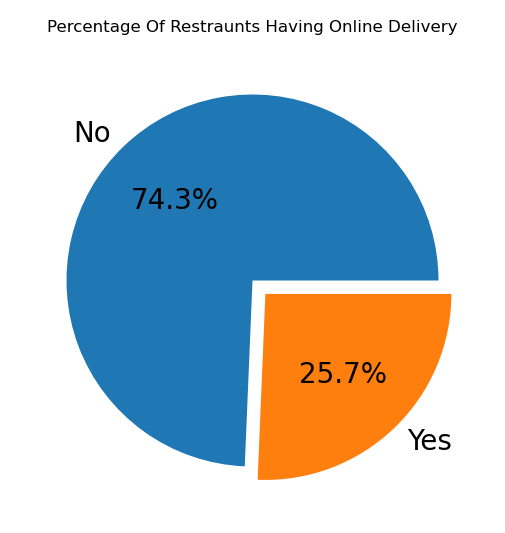

In [54]:
c=(not_have,have)
plt.figure(figsize=(3,4),dpi=200)
plt.pie(c,labels=['No','Yes'],autopct='%1.1f%%',explode =[0,0.1])
plt.title("Percentage Of Restraunts Having Online Delivery",fontsize =6)
plt.show()

### Average Ratings of Restaurants with and without online Delivery.

In [55]:
df.head(1)

Restaurant ID   Restaurant Name         City  \
0        6317637  Le Petit Souffle  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   

                                    Locality                    Cuisines  \
0  Century City Mall, Poblacion, Makati City  French, Japanese, Desserts   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314

In [56]:
print("Average Ratings of Restaurants with and without online Delivery.")
p= (df.groupby('Has Online delivery')['Aggregate rating'].mean())
no = (df.groupby('Has Online delivery')['Aggregate rating'].mean().values[0])
yes = (df.groupby('Has Online delivery')['Aggregate rating'].mean().values[1])
# print(p)
for i,j in p.iteritems():
    print(f"'{i}'   :   {j}")
print()
print("Average Ratings of Restaurants without online Delivery :", "{:.2f}".format(no))
print()
print("Average Ratings of Restaurants Having online Delivery  :","{:.2f}".format(yes))

Average Ratings of Restaurants with and without online Delivery.
'No'   :   2.465295774647887
'Yes'   :   3.2488372093023252

Average Ratings of Restaurants without online Delivery : 2.47

Average Ratings of Restaurants Having online Delivery  : 3.25


# LEVEL 2, TASK 1

#### Calculate the average number of votes received by restaurants.


In [57]:
df.head(2)

Restaurant ID   Restaurant Name         City  \
0        6317637  Le Petit Souffle  Makati City   
1        6304287  Izakaya Kikufuji  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality                    Cuisines  \
0   Century City Mall, Poblacion, Makati City  French, Japanese, Desserts   
1  Little Tokyo, Legaspi Village, Makati City                    Japanese   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314  
1               4.5   Dark Green   Excellent    591

In [58]:
v = df['Votes'].mean()
print(f"Average Number Of Votes Received by Restraunts : ","{:.3f}".format(v))

Average Number Of Votes Received by Restraunts :  156.910


### Analyzing The distribution Of Aggregate Ratings And Determine The Most Common Rating Range

In [59]:
most_common = df["Aggregate rating"].value_counts().sort_values(ascending= False).idxmax()
print("Most Common Rating Range : ",most_common)

Most Common Rating Range :  0.0


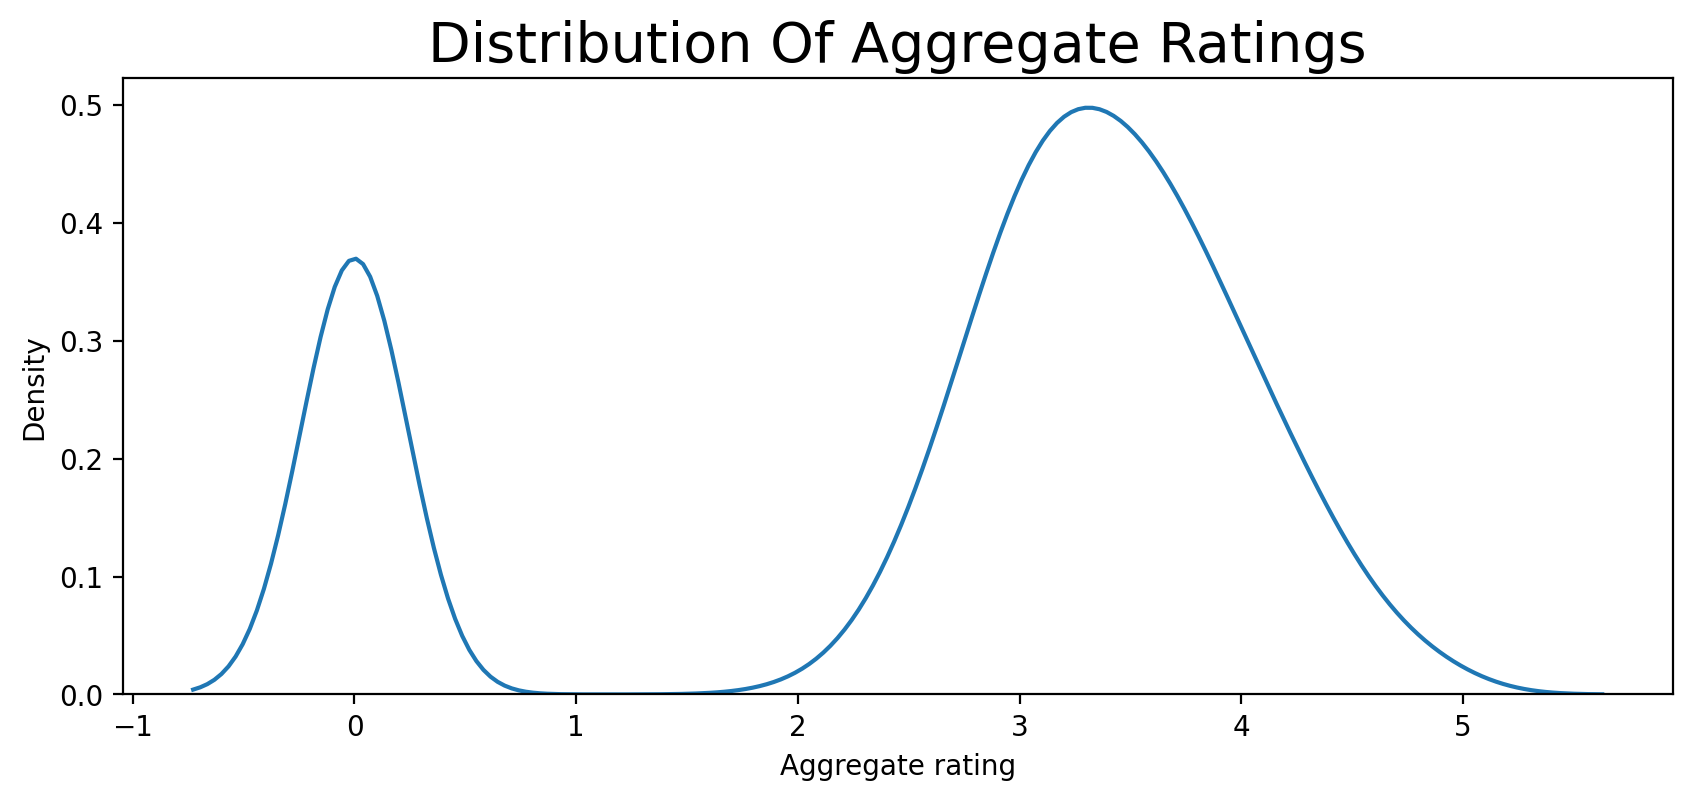

In [60]:
plt.figure(figsize=(10,4),dpi=200)
sns.distplot(df["Aggregate rating"],hist=False)
plt.title("Distribution Of Aggregate Ratings",fontsize=20)
plt.show()

# LEVEL 2, TASK 2

### Identify the most common combinations of cuisines in the dataset.

In [61]:
df.head(2)

Restaurant ID   Restaurant Name         City  \
0        6317637  Le Petit Souffle  Makati City   
1        6304287  Izakaya Kikufuji  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality                    Cuisines  \
0   Century City Mall, Poblacion, Makati City  French, Japanese, Desserts   
1  Little Tokyo, Legaspi Village, Makati City                    Japanese   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314  
1               4.5   Dark Green   Excellent    591

In [62]:
most_common = df['Cuisines'].value_counts().head(10)
print("Top Most Cuisines : \n",most_common )

Top Most Cuisines : 
 North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


In [63]:
print("Average ratings of Top 10 suisines  :  \n \n", df.groupby('Cuisines')['Aggregate rating'].mean().nlargest(10)
)

Average ratings of Top 10 suisines  :  
 
 Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
BBQ, Breakfast, Southern        4.9
Burger, Bar Food, Steak         4.9
Continental, Indian             4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
Name: Aggregate rating, dtype: float64


## LEVEL 2 TASK 3

# 

### Plot the locations of restaurants on a map using longitude and latitude coordinates

In [64]:
df2 = pd.read_csv("Dataset.csv") #reading the csv file into pandas data frame

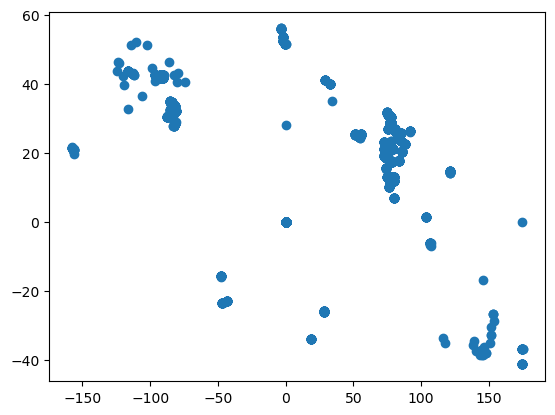

In [65]:
plt.scatter(x=df2['Longitude'], y=df2['Latitude'])
plt.show()

In [66]:
import plotly.express as px
import pandas as pd
fig = px.scatter_geo(df2,lat='Latitude',lon='Longitude',hover_name="Restaurant ID")
fig.update_layout(title = 'World map', title_x=0.9)
fig.show()

## LEVEL 2 TASK 4

### Identify if there are any restaurant chains present in the dataset.

In [67]:
chain_counts = df['Restaurant Name'].value_counts()
chain_counts

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64

In [68]:
restraunt_chains = chain_counts[chain_counts>1]

In [69]:
print("Restraunt Chains : \n ",restraunt_chains)

Restraunt Chains : 
  Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: Restaurant Name, Length: 734, dtype: int64


### Analyze The Ratings And Popularity Of Different Restaurant Chains

In [70]:
chain = df.groupby('Restaurant Name').agg({'Aggregate rating':'mean','Votes':'sum'})
top_10 = chain.sort_values('Aggregate rating', ascending=False).head(10)
print("Top Ten Restraunt chains : \n \n ",top_10)

Top Ten Restraunt chains : 
 
                                  Aggregate rating  Votes
Restaurant Name                                        
Restaurant Mosaic @ The Orient               4.9     85
Ministry of Crab                             4.9    203
Miann                                        4.9    281
Shorts Burger and Shine                      4.9    820
Milse                                        4.9    754
Yellow Dog Eats                              4.9   1252
Duck & Waffle                                4.9    706
Gaga Manjero                                 4.9     95
Mirchi And Mime                              4.9   3244
McGuire's Irish Pub & Brewery                4.9   2238


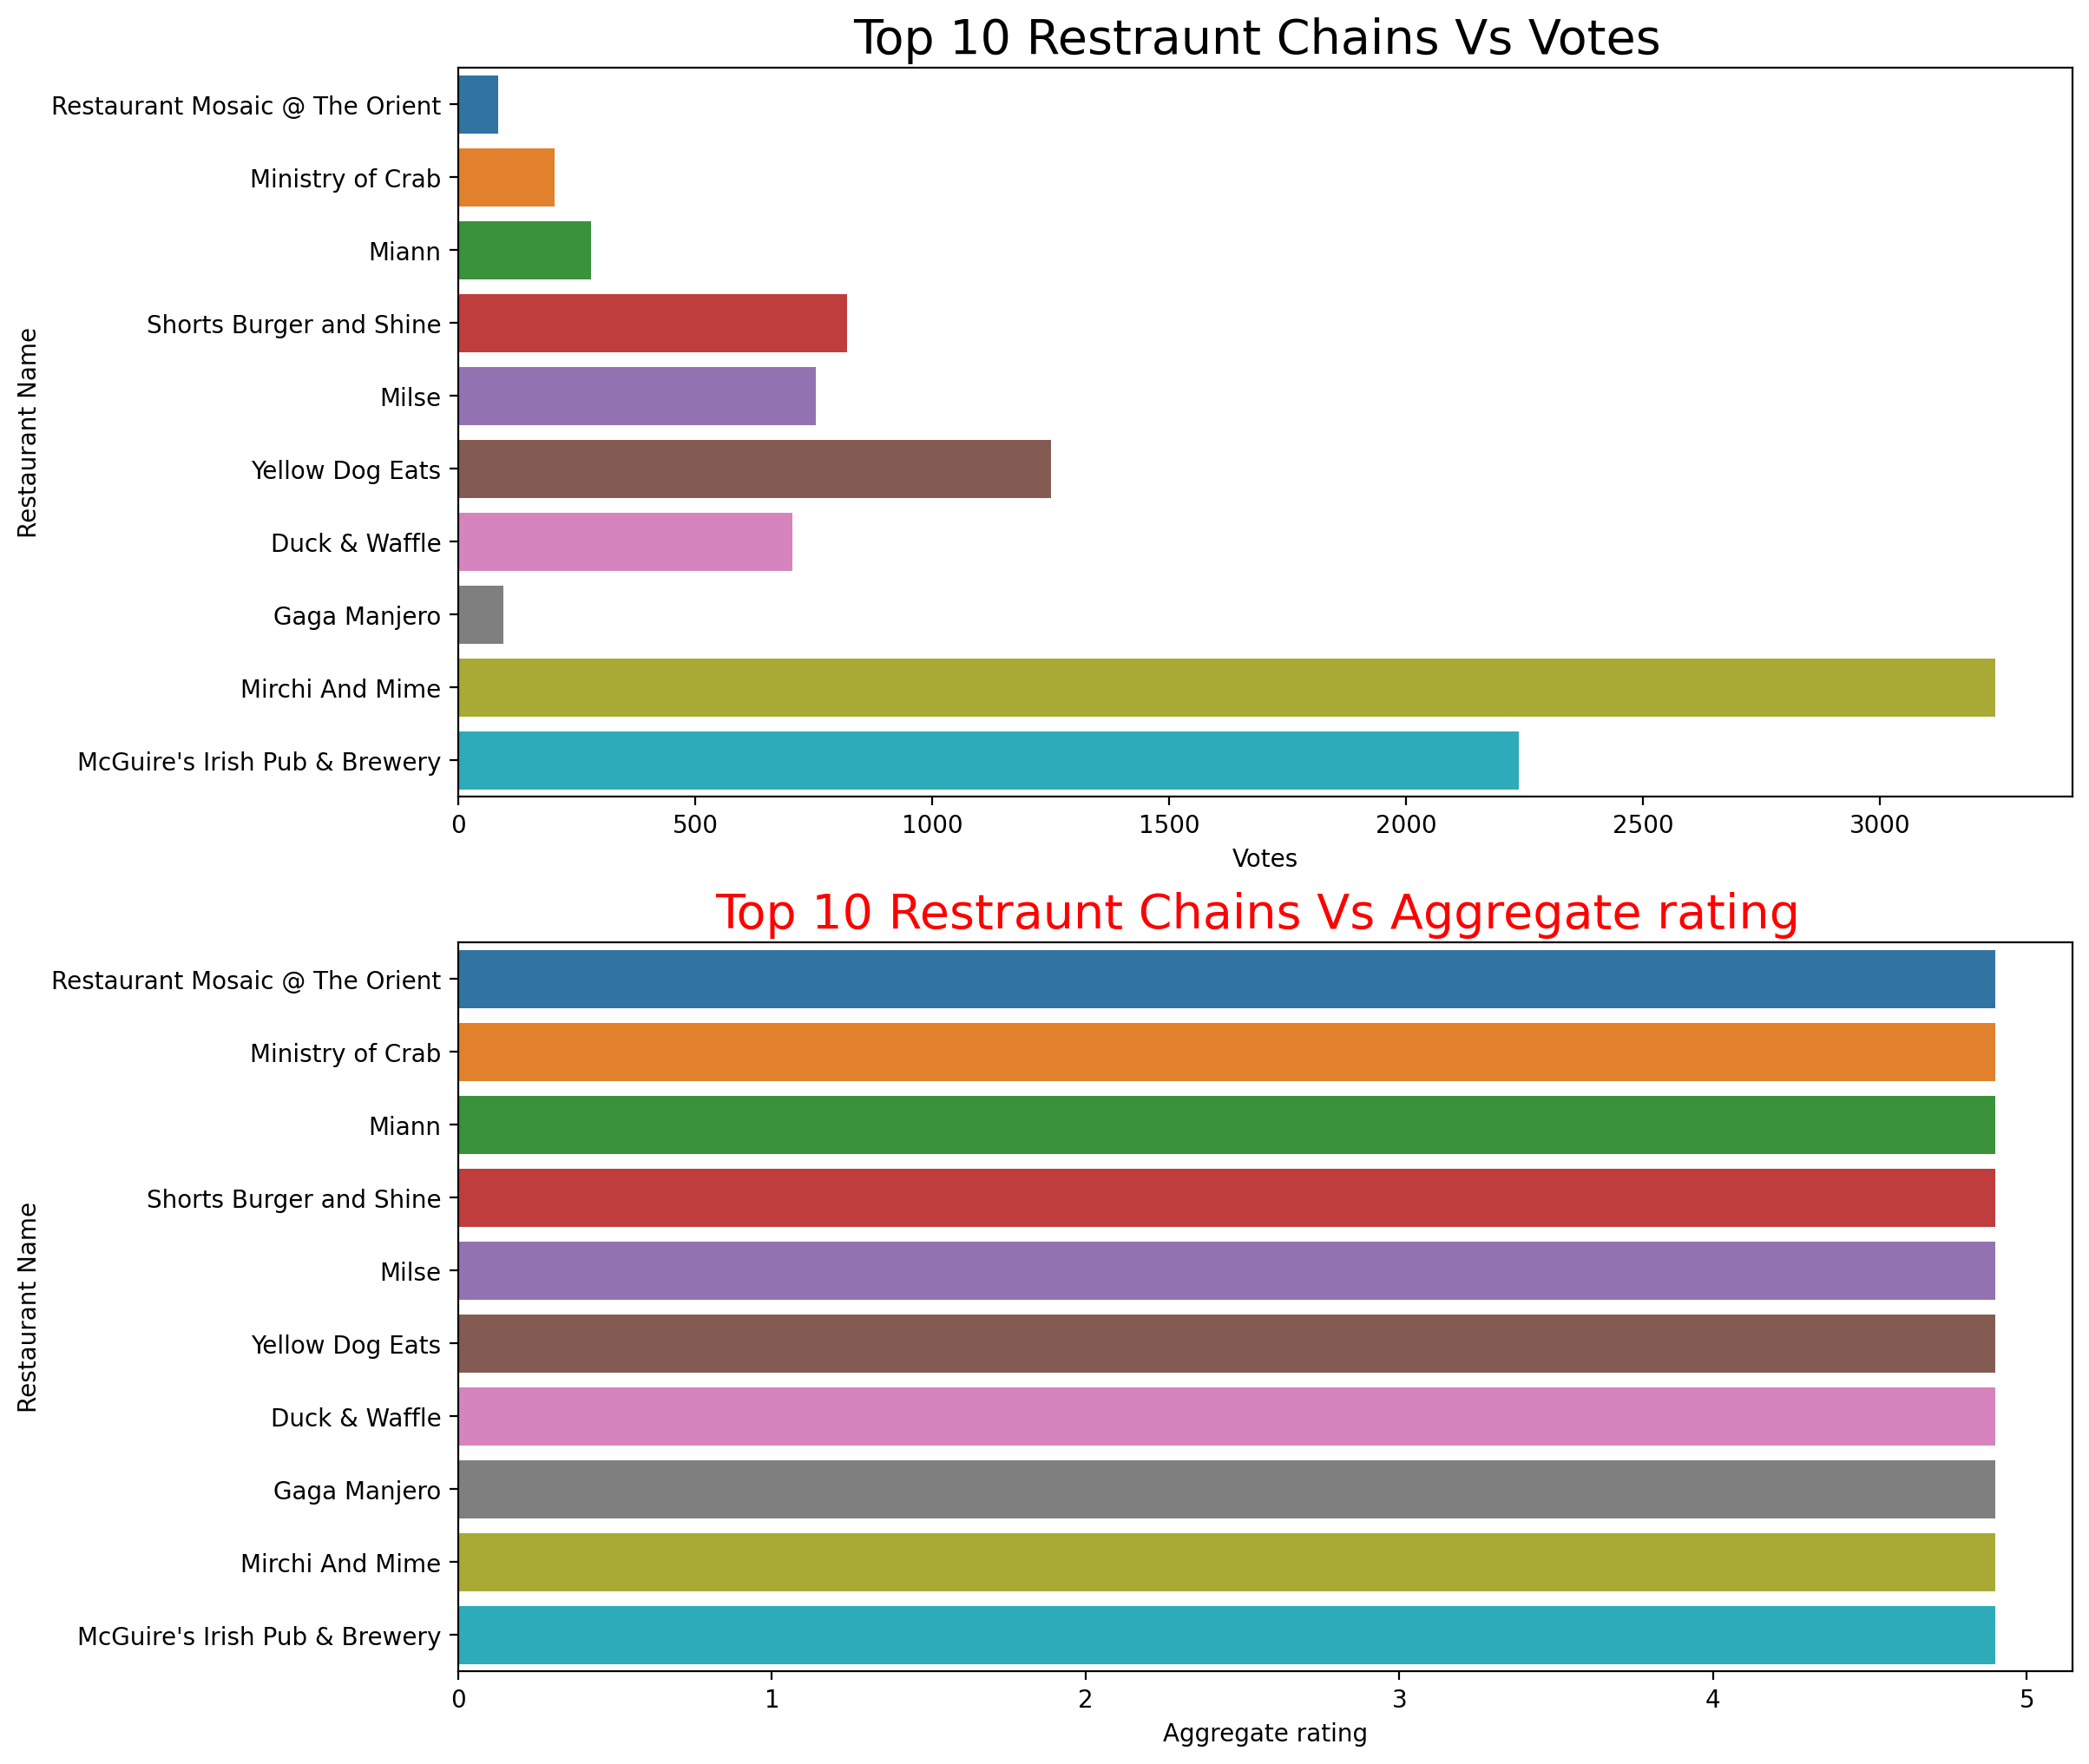

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure(figsize=(12,12),dpi=200)
plt.subplot(2,1,1)
sns.barplot(y=top_10.index,x=top_10['Votes'])
plt.title("Top 10 Restraunt Chains Vs Votes ",fontsize=20)
plt.subplot(2,1,2)
sns.barplot(y=top_10.index,x=top_10['Aggregate rating'])
plt.title("Top 10 Restraunt Chains Vs Aggregate rating ",color = 'red',fontsize=20)
plt.show()
plt.savefig("squares.png") 


# LEVEL 3 TASK 1

In [72]:
df.head(2)

Restaurant ID   Restaurant Name         City  \
0        6317637  Le Petit Souffle  Makati City   
1        6304287  Izakaya Kikufuji  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality                    Cuisines  \
0   Century City Mall, Poblacion, Makati City  French, Japanese, Desserts   
1  Little Tokyo, Legaspi Village, Makati City                    Japanese   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314  
1               4.5   Dark Green   Excellent    591

In [73]:
df['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

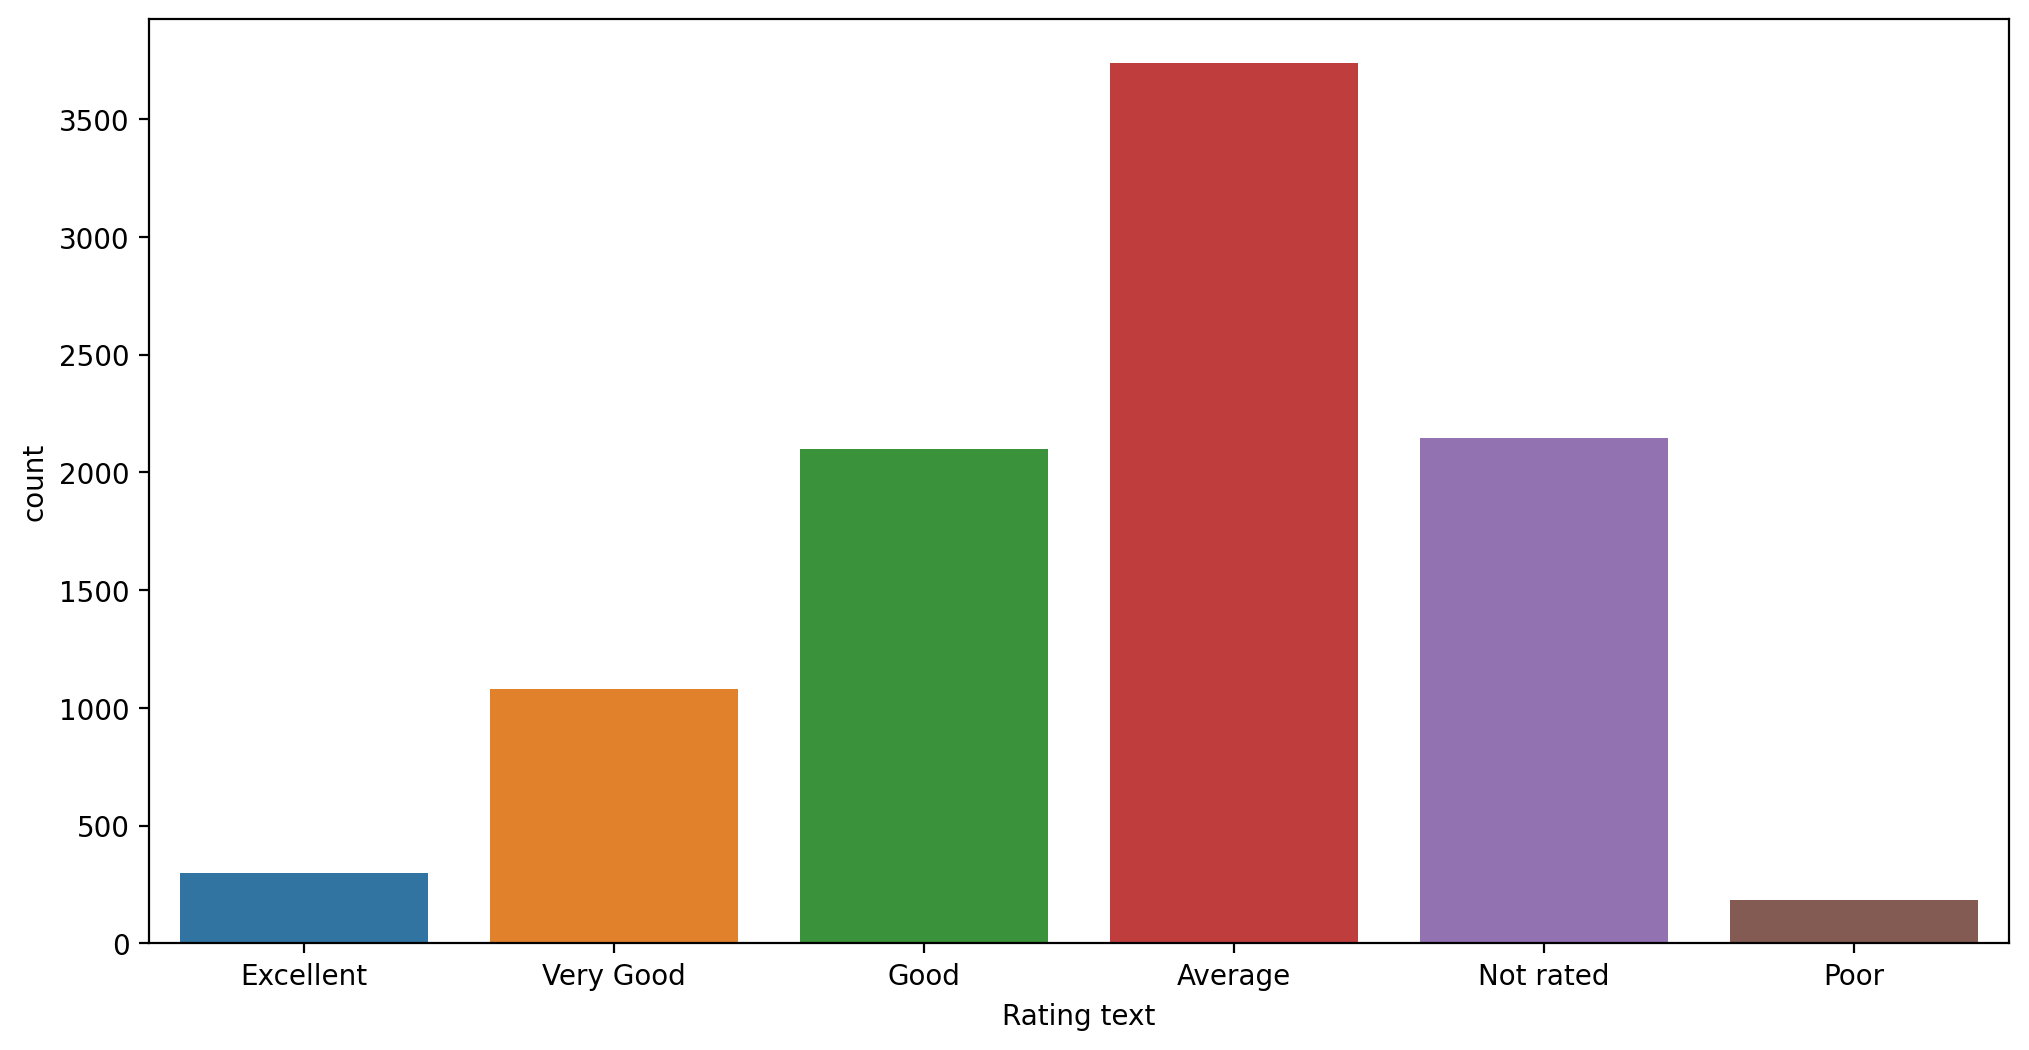

In [74]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(df['Rating text'])
plt.show()

## LEVEL 3 TASK 2

### Identify the restaurants with the highest and Lowest number of votes.

In [75]:
df['Votes'].value_counts().sort_values(ascending=False).head(10)

0     1094
1      483
2      327
3      244
4      207
7      168
5      164
6      154
10     135
8      134
Name: Votes, dtype: int64

In [76]:
df['Votes'].sort_values(ascending =False).head(10)

728     10934
735      9667
3994     7931
2412     7574
739      6907
2414     5966
743      5705
2307     5434
736      5385
2411     5288
Name: Votes, dtype: int64

In [120]:
print("Top 10 Restaurants with Highest Votes: \n")
top_10 = df['Votes'].sort_values(ascending=False).head(10)
for i, ind in enumerate(top_10.index, start=1):
    print(f"{i}. Restaurant Name is: '{df['Restaurant Name'][ind]}' and the Number Of Votes Are: '{df['Votes'][ind]}'", end="\n \n")


Top 10 Restaurants with Highest Votes: 

1. Restaurant Name is: 'Toit' and the Number Of Votes Are: '10934'
 
2. Restaurant Name is: 'Truffles' and the Number Of Votes Are: '9667'
 
3. Restaurant Name is: 'Hauz Khas Social' and the Number Of Votes Are: '7931'
 
4. Restaurant Name is: 'Peter Cat' and the Number Of Votes Are: '7574'
 
5. Restaurant Name is: 'AB's - Absolute Barbecues' and the Number Of Votes Are: '6907'
 
6. Restaurant Name is: 'Barbeque Nation' and the Number Of Votes Are: '5966'
 
7. Restaurant Name is: 'Big Brewsky' and the Number Of Votes Are: '5705'
 
8. Restaurant Name is: 'AB's - Absolute Barbecues' and the Number Of Votes Are: '5434'
 
9. Restaurant Name is: 'The Black Pearl' and the Number Of Votes Are: '5385'
 
10. Restaurant Name is: 'BarBQ' and the Number Of Votes Are: '5288'
 


In [127]:
# top_10 = df['Votes'].sort_values(ascending =False).tail(10)
# for ind in top_10.index:
#     print(df['Restaurant Name'][ind], df['Votes'][ind])

In [126]:
print("Top 10 Restaurants with Low Votes: \n")
low_10 = df['Votes'].sort_values(ascending=False).tail(10)
for i, ind in enumerate(low_10.index, start=1):
    print(f"{i}. Restaurant Name is: '{df['Restaurant Name'][ind]}' and the Number Of Votes Are: '{df['Votes'][ind]}'", end="\n \n")


Top 10 Restaurants with Low Votes: 

1. Restaurant Name is: 'Chennai Express' and the Number Of Votes Are: '0'
 
2. Restaurant Name is: 'K.D Corner' and the Number Of Votes Are: '0'
 
3. Restaurant Name is: 'The Black Kettle' and the Number Of Votes Are: '0'
 
4. Restaurant Name is: 'Muradabadi Chicken Biryani Corner' and the Number Of Votes Are: '0'
 
5. Restaurant Name is: 'Bikaner Misthan Bhandar' and the Number Of Votes Are: '0'
 
6. Restaurant Name is: 'KitchenYard' and the Number Of Votes Are: '0'
 
7. Restaurant Name is: 'Fritrolla' and the Number Of Votes Are: '0'
 
8. Restaurant Name is: 'Zombiez' and the Number Of Votes Are: '0'
 
9. Restaurant Name is: 'Zaika Chicken Corner' and the Number Of Votes Are: '0'
 
10. Restaurant Name is: 'Singh Chinese Fast Food' and the Number Of Votes Are: '0'
 


### Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [139]:
df.head(1)

Restaurant ID   Restaurant Name         City  \
0        6317637  Le Petit Souffle  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   

                                    Locality                    Cuisines  \
0  Century City Mall, Poblacion, Makati City  French, Japanese, Desserts   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314

In [136]:
df.corr()

Restaurant ID  Average Cost for two  Price range  \
Restaurant ID              1.000000             -0.001693    -0.134540   
Average Cost for two      -0.001693              1.000000     0.075083   
Price range               -0.134540              0.075083     1.000000   
Aggregate rating          -0.326212              0.051792     0.437944   
Votes                     -0.147023              0.067783     0.309444   

                      Aggregate rating     Votes  
Restaurant ID                -0.326212 -0.147023  
Average Cost for two          0.051792  0.067783  
Price range                   0.437944  0.309444  
Aggregate rating              1.000000  0.313691  
Votes                         0.313691  1.000000

a correlation coefficient of 0.3136 being positive indicates that there is some tendency for the variables to move together in a positive direction, albeit moderately.

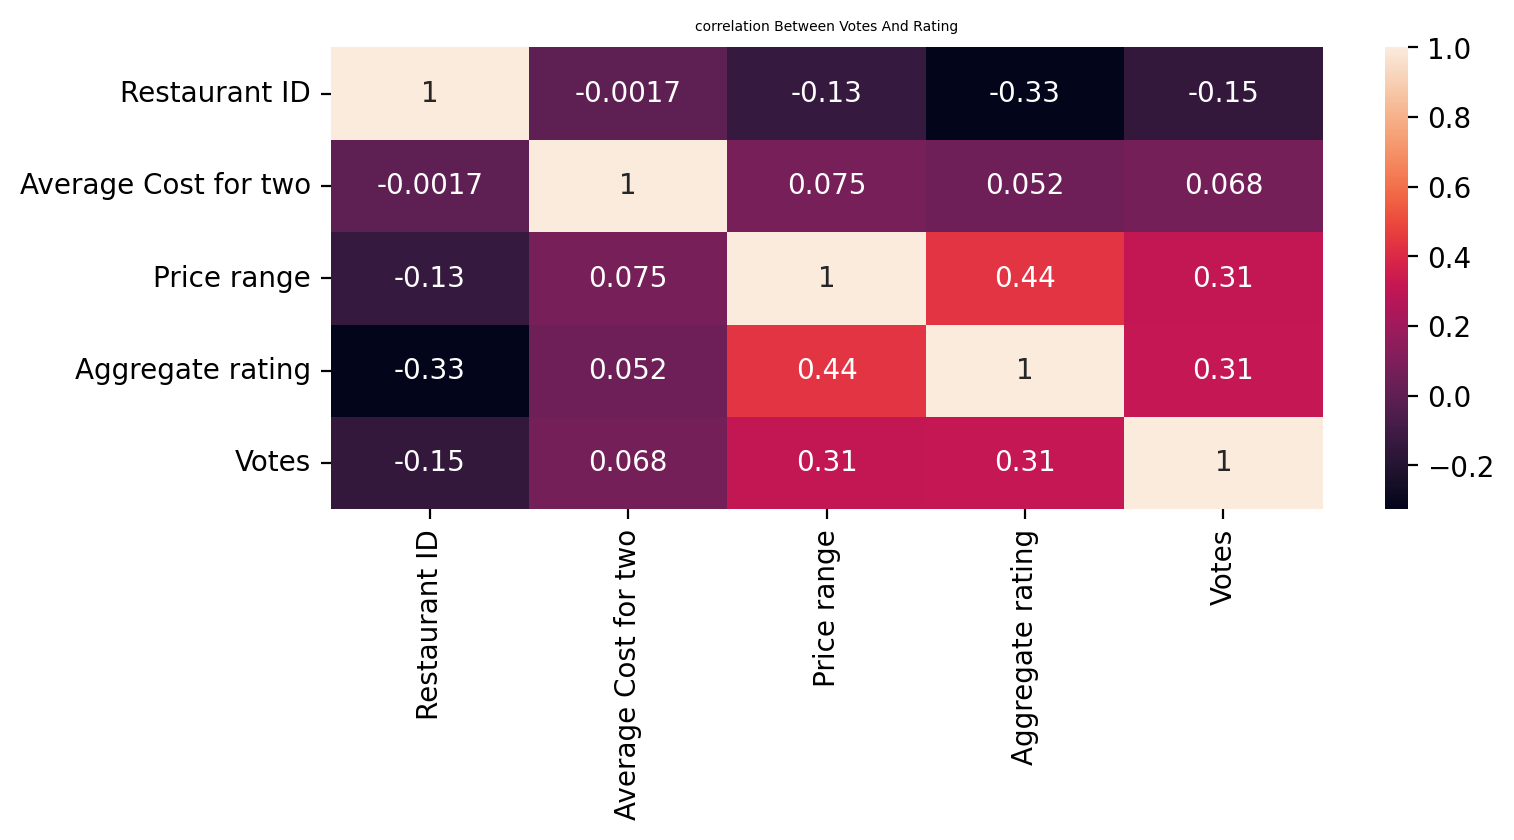

In [148]:
# plotting correlation heatmap 
plt.figure(figsize=(8,3),dpi= 200)
sns.heatmap(df.corr(), annot=True)
plt.title("correlation Between Votes And Rating",fontsize=5)
plt.show()

# LEVEL 3 TASK 3

### Analyze if there is a relationship between the price range and the availability of online delivery and table booking

In [149]:
df.head(1)

Restaurant ID   Restaurant Name         City  \
0        6317637  Le Petit Souffle  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   

                                    Locality                    Cuisines  \
0  Century City Mall, Poblacion, Makati City  French, Japanese, Desserts   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314

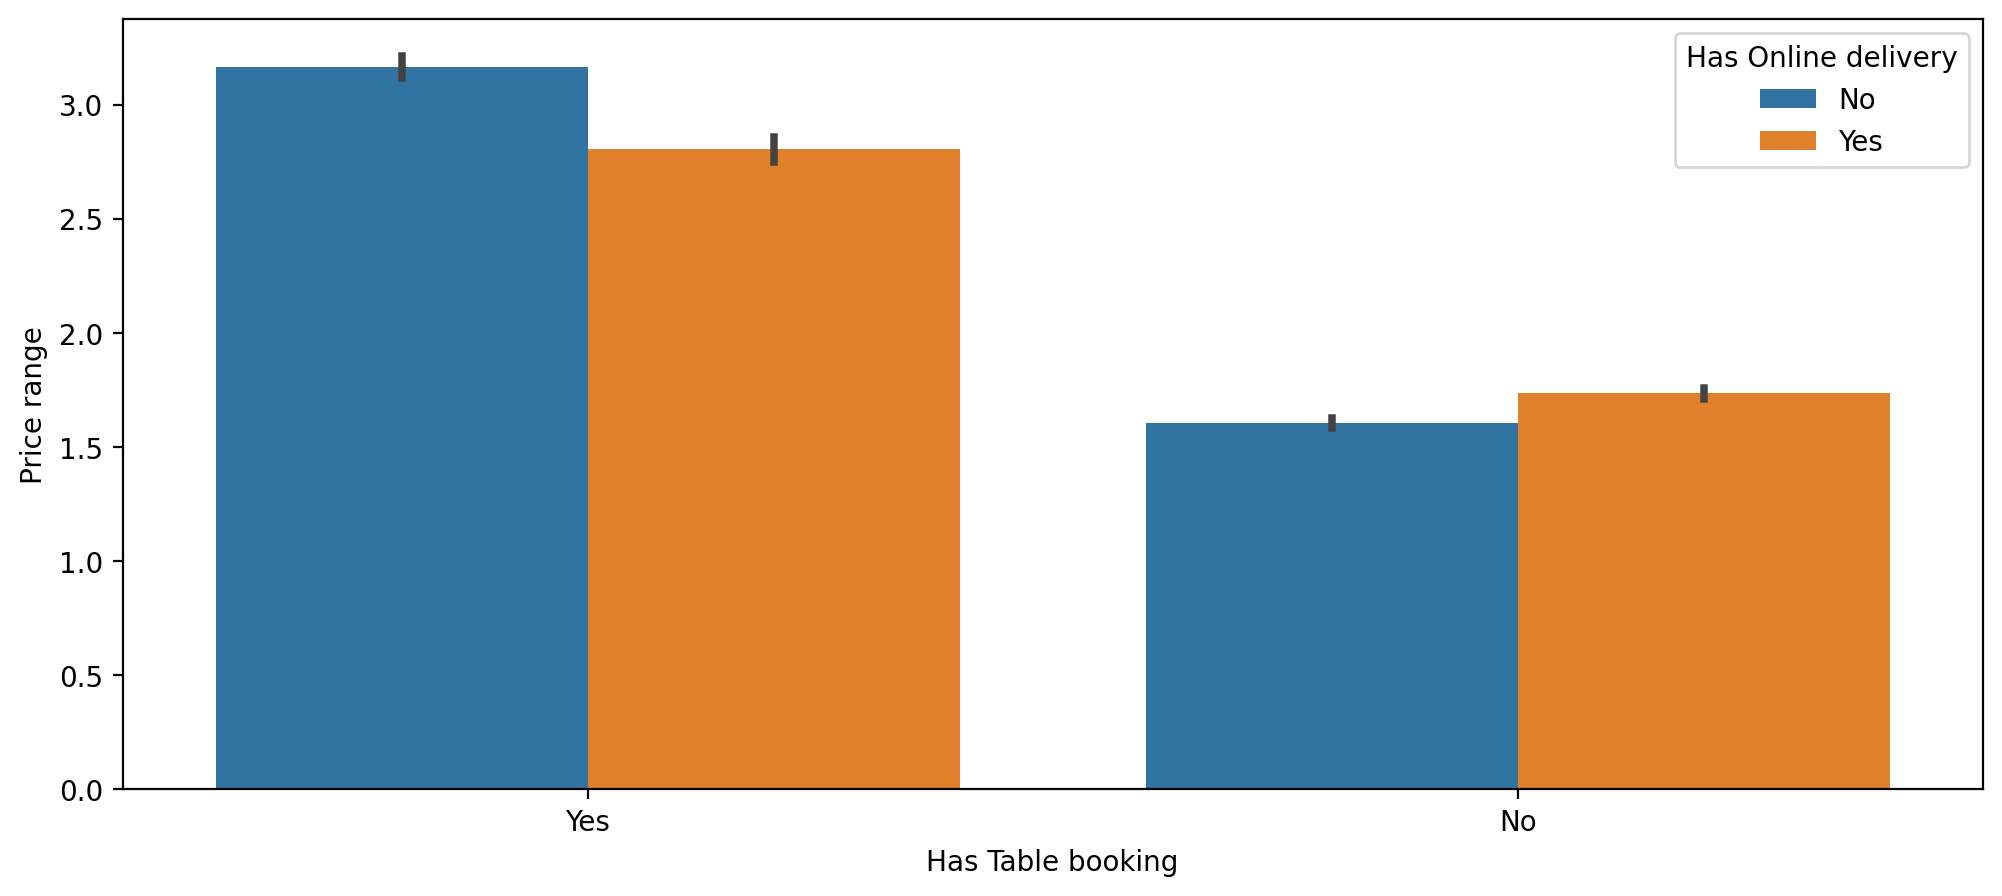

In [166]:
plt.figure(figsize=(12,5),dpi= 200)
sns.barplot(y= 'Price range',x='Has Table booking' ,hue ='Has Online delivery' ,data=df)
plt.show()

Here we Can analyse that the price range is more in restraunts with having table booking but not having online delivery

In [170]:
df.groupby(['Has Online delivery','Has Table booking'])['Price range'].value_counts().sort_values(ascending=False)

Has Online delivery  Has Table booking  Price range
No                   No                 1              3743
                                        2              1711
Yes                  No                 2              1163
                                        1               700
No                   No                 3               624
                     Yes                3               373
                     No                 4               299
Yes                  Yes                3               271
No                   Yes                4               234
Yes                  No                 3               140
                     Yes                2               123
No                   Yes                2               116
Yes                  Yes                4                40
                     No                 4                13
                     Yes                1                 1
Name: Price range, dtype: int64

## Determine if higher-priced restaurants are more likely to offer these services.

In [184]:
# Filter the DataFrame for higher-priced restaurants
higher_priced_restaurants = df[df['Price range'].isin([3, 4])]

# Calculate the count of higher-priced restaurants offering online delivery and table booking services
higher_priced_with_services_count = higher_priced_restaurants[(higher_priced_restaurants['Has Online delivery'] == True) & 
                                                             (higher_priced_restaurants['Has Table booking'] == True)].shape[0]

# Calculate the percentage of higher-priced restaurants that offer these services
percentage_higher_priced_with_services = (higher_priced_with_services_count / len(higher_priced_restaurants)) * 100

print("\nPercentage of higher-priced restaurants offering online delivery and table booking services:")
print(percentage_higher_priced_with_services)



Percentage of higher-priced restaurants offering online delivery and table booking services:
0.0


<h1><center style="font-size:larger; color:blue;">THANK YOU</center></h1>
